In [25]:
import pandas as pd

data = pd.read_csv('../data/dataframe_final.csv', index_col=0)
label = pd.read_csv('../data/label_final.csv', index_col=0)
data

date  danceability  energy  loudness  mode  speechiness  \
1963-01-01     0           173     861      3246     1          231   
1963-01-01     0           254     245      2251     1           85   
1963-01-01     0           591     845      3404     1          144   
1963-01-01     0           372     501      3930     1           51   
1963-01-01     0           610     791      3439     1          440   
...          ...           ...     ...       ...   ...          ...   
2022-12-26   834           346     668      1043     1           70   
2022-12-26   834           405     655      2675     0           46   
2022-12-26   834           432     594      1716     1          662   
2022-12-26   834           377     393      3764     1          595   
2022-12-26   834           382     223      4355     1           82   

            acousticness  instrumentalness  liveness  valence  tempo  
1963-01-01            98              1819       905      719   4569  
1963-01-01          1271                 0       786      504    858  
1963-01-01           934               380       414      904   6858  
1963-01-01          1582              2922      1156      595   4349  
1963-01-01          1173              2930       347      776   3377  
...                  ...               ...       ...      ...    ...  
2022-12-26           767                 0       642      682   3100  
2022-12-26           249              1852       821      758   1270  
2022-12-26          1373                75       655      558   1652  
2022-12-26          2132                80       621      549    897  
2022-12-26          1907              1839       568      292   2798  

[313187 rows x 11 columns]

In [26]:
data['mode'] = data['mode'].replace(2, 1)

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_std = scaler.fit_transform(data)
data = pd.DataFrame(data_std, columns=data.columns, index=data.index)

In [28]:
# split index's string(YYYY-mm-dd) into year, month, day
data['year'] = data.index.str.split('-').str[0].astype(int)
data['month'] = data.index.str.split('-').str[1].astype(int)
data['day'] = data.index.str.split('-').str[2].astype(int)

label['year'] = label.index.str.split('-').str[0].astype(int)
label['month'] = label.index.str.split('-').str[1].astype(int)
label['day'] = label.index.str.split('-').str[2].astype(int)

In [29]:
data

date  danceability    energy  loudness      mode  speechiness  \
1963-01-01 -1.722298     -1.535255  1.728570  0.476007  0.626675    -0.370877   
1963-01-01 -1.722298     -1.023289 -1.359900 -0.175764  0.626675    -0.848745   
1963-01-01 -1.722298      1.106741  1.648350  0.579505  0.626675    -0.655634   
1963-01-01 -1.722298     -0.277463 -0.076380  0.924059  0.626675    -0.960029   
1963-01-01 -1.722298      1.226832  1.377608  0.602431  0.626675     0.313195   
...              ...           ...       ...       ...       ...          ...   
2022-12-26  1.943388     -0.441797  0.760917 -0.967060  0.626675    -0.897841   
2022-12-26  1.943388     -0.068884  0.695738  0.101976 -1.595722    -0.976395   
2022-12-26  1.943388      0.101771  0.389899 -0.526214  0.626675     1.039817   
2022-12-26  1.943388     -0.245860 -0.617865  0.815321  0.626675     0.820521   
2022-12-26  1.943388     -0.214257 -1.470202  1.202454  0.626675    -0.858564   

            acousticness  instrumentalness  liveness   valence     tempo  \
1963-01-01     -2.169749          1.137675  0.862400  0.575627  0.693994   
1963-01-01      0.084397         -0.861027  0.438857 -0.325204 -1.121667   
1963-01-01     -0.563213         -0.443486 -0.885160  1.350760  1.813920   
1963-01-01      0.682044          2.349643  1.755756  0.056078  0.586356   
1963-01-01     -0.103929          2.358433 -1.123626  0.814451  0.110790   
...                  ...               ...       ...       ...       ...   
2022-12-26     -0.884136         -0.861027 -0.073666  0.420600 -0.024736   
2022-12-26     -1.879574          1.173936  0.563429  0.739033 -0.920090   
2022-12-26      0.280410         -0.778617 -0.027396 -0.098949 -0.733191   
2022-12-26      1.738975         -0.773123 -0.148409 -0.136658 -1.102586   
2022-12-26      1.306594          1.159651 -0.337045 -1.213464 -0.172494   

            year  month  day  
1963-01-01  1963      1    1  
1963-01-01  1963      1    1  
1963-01-01  1963      1    1  
1963-01-01  1963      1    1  
1963-01-01  1963      1    1  
...          ...    ...  ...  
2022-12-26  2022     12   26  
2022-12-26  2022     12   26  
2022-12-26  2022     12   26  
2022-12-26  2022     12   26  
2022-12-26  2022     12   26  

[313187 rows x 14 columns]

In [30]:
label

0  year  month  day
1963-01-01    1  1963      1    1
1963-01-01    2  1963      1    1
1963-01-01    3  1963      1    1
1963-01-01    4  1963      1    1
1963-01-01    5  1963      1    1
...         ...   ...    ...  ...
2022-12-26   96  2022     12   26
2022-12-26   97  2022     12   26
2022-12-26   98  2022     12   26
2022-12-26   99  2022     12   26
2022-12-26  100  2022     12   26

[313187 rows x 4 columns]

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import scipy
# show effect of each column on label
# for especially y year m month
# x-axis: column value
# y-axis: label value
# hue: year, month
# regression plot
# scatter plot
# show correlation
# for each 10 columns, 10 plots
features = ['danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
def showCorrelationAt(year, month):
    # show effect of each column on label
    # for especially y year m month
    # x-axis: column value
    # y-axis: label value
    # hue: year, month
    # regression plot
    # scatter plot
    # show correlation
    # for each 10 columns, 10 plots
    data_year = data[data['year'] == year]
    data_month = data_year[data_year['month'] == month]
    label_year = label[label['year'] == year]
    label_month = label_year[label_year['month'] == month]
    
    dataForShow = data_month[features]
    std = StandardScaler()
    dataForShow = pd.DataFrame(std.fit_transform(dataForShow), columns=features, index=dataForShow.index)
    dataForShow['label'] = label_month['0']

    for i, feature in enumerate(features):
        sns.regplot(x=feature, y='label', data=dataForShow, ax=axs[i//5][i%5])
        axs[i//5][i%5].set_title(f'{feature} vs label')
        axs[i//5][i%5].set_xlabel(feature)
        axs[i//5][i%5].set_ylabel('label')
        axs[i//5][i%5].grid()
        slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(dataForShow[feature], dataForShow['label'])
        axs[i//5][i%5].text(0.1, 0.9, f'correlation: {r_value:.2f}', transform=axs[i//5][i%5].transAxes)
    
        

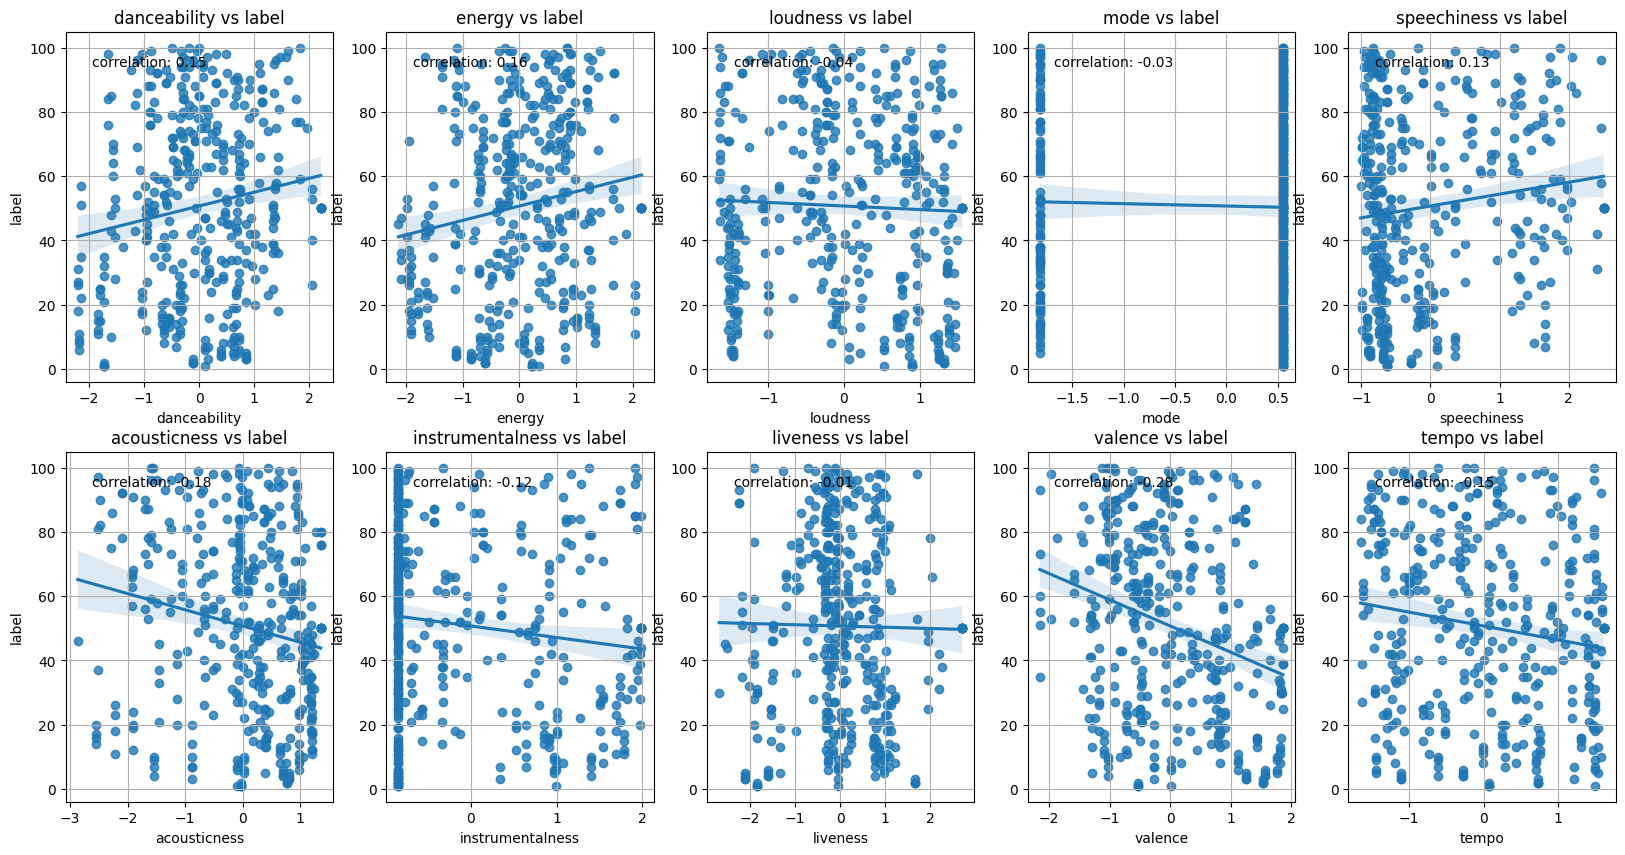

In [32]:
fig, axs = plt.subplots(2, 5, figsize=(20, 10))
showCorrelationAt(2022, 12)
plt.show()

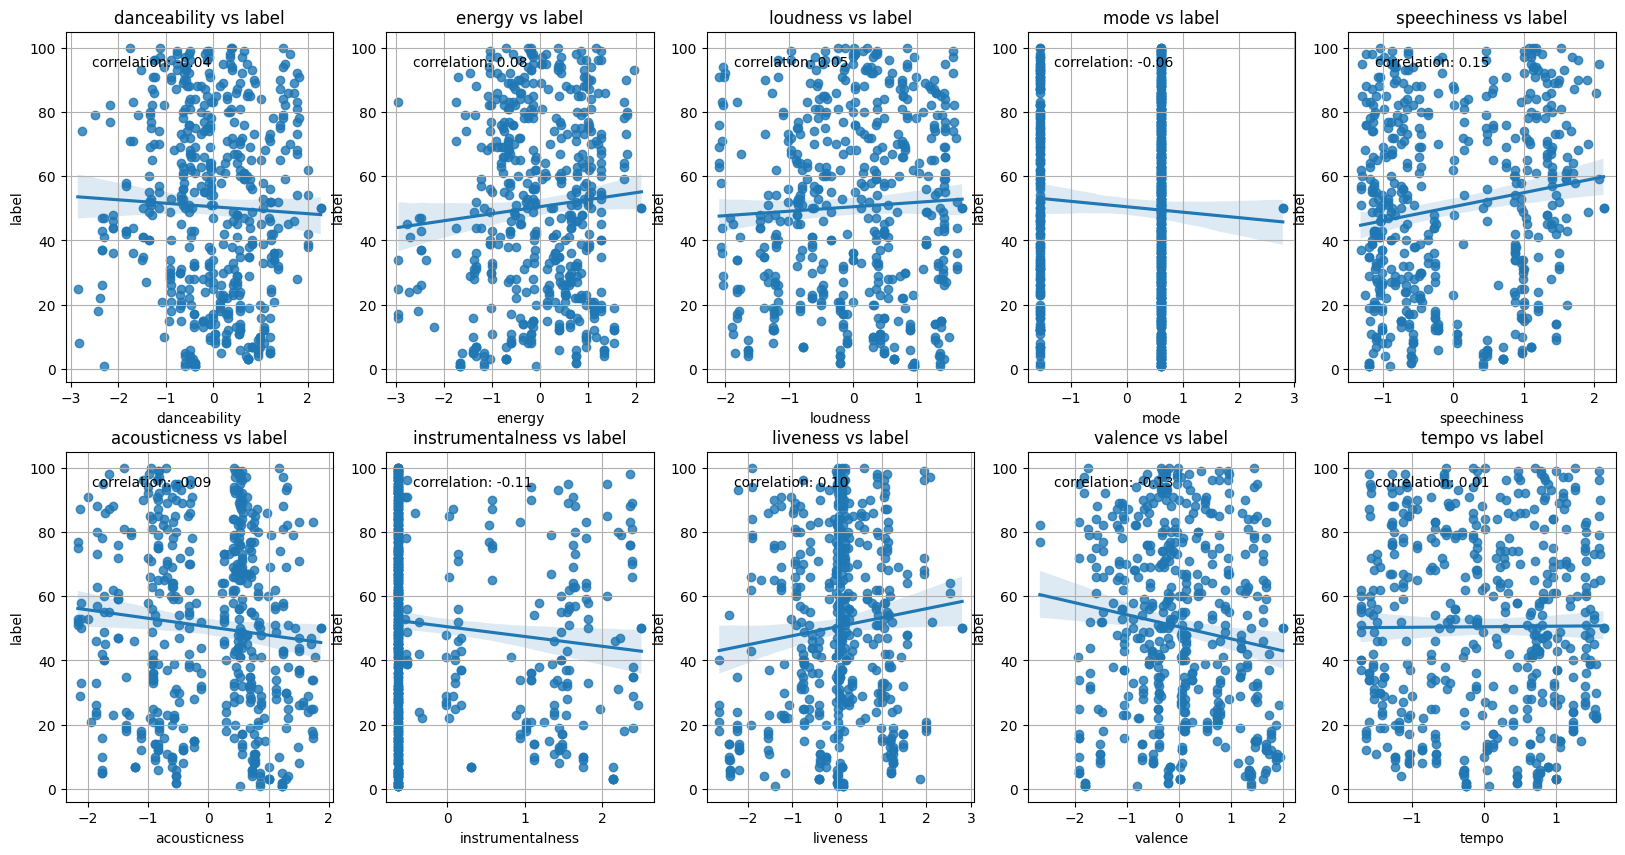

In [14]:
fig, axs = plt.subplots(2, 5, figsize=(20, 10))
for i in range(1, 13):
    showCorrelationAt(2022, i)
plt.show()

In [33]:
# show effect of each column on label
# for especially y year for all month
# x-axis: column value
# y-axis: label value
# hue: year, month
# regression plot
# scatter plot
# show correlation
# for each 10 columns, 10 plots

def corr(year):
    for m in range(1, 13):
        data_year = data[data['year'] == year]
        data_month = data_year[data_year['month'] == m]
        label_year = label[label['year'] == year]
        label_month = label_year[label_year['month'] == m]

        dataForShow = data_month[features]
        std = StandardScaler()
        dataForShow = pd.DataFrame(std.fit_transform(dataForShow), columns=features, index=dataForShow.index)
        dataForShow['label'] = label_month['0']

        for i, feature in enumerate(features):
            sns.regplot(x=feature, y='label', data=dataForShow, ax=axs[i//5][i%5])
            axs[i//5][i%5].set_title(f'{feature} vs label')
            axs[i//5][i%5].set_xlabel(feature)
            axs[i//5][i%5].set_ylabel('label')
            axs[i//5][i%5].grid()
            slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(dataForShow[feature], dataForShow['label'])
            axs[i//5][i%5].text(0.1, 0.9, f'correlation: {r_value:.2f}', transform=axs[i//5][i%5].transAxes)
    plt.show()

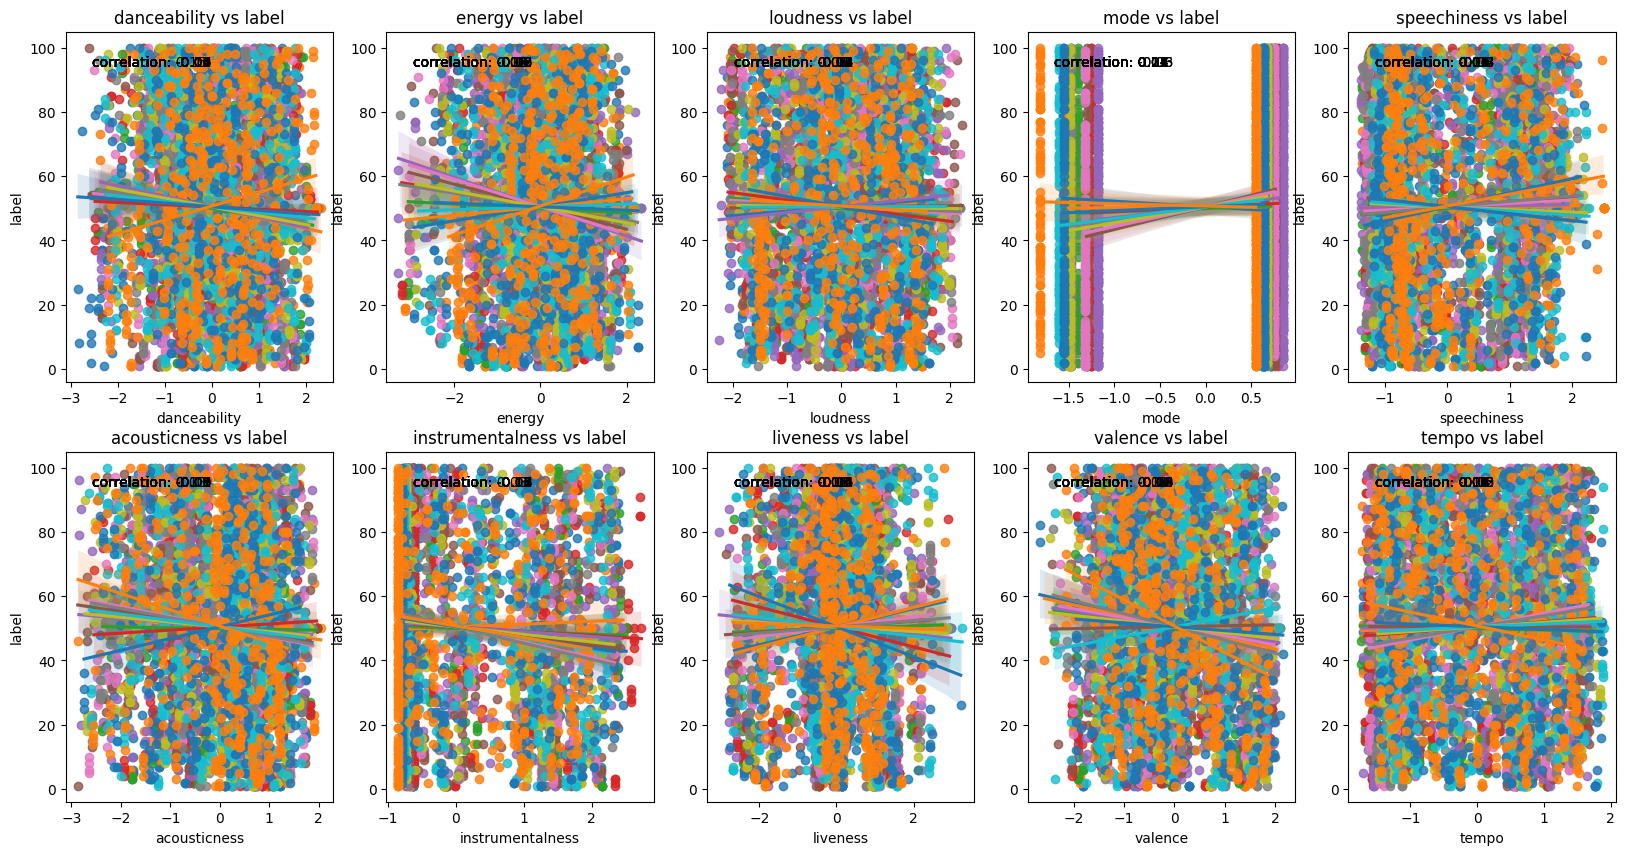

In [34]:
fig, axs = plt.subplots(2, 5, figsize=(20, 10))

corr(2022)

In [33]:
# show feature mean in a year
# x-axis: date
# y-axis: feature value

def showFeaturesMeanInYear(year, features):
    data_year = data[data['year'] == year]
    f = features.copy()
    f.append('month')
    data_year = data_year[f]
    # get mean of each month
    data_year = data_year.groupby('month').mean()
    
    data_year.plot(figsize=(20, 10))
    # draw a line of every date and every feature's total mean
    plt.axhline(data_year.mean().mean(), color='r')
    
    plt.show()

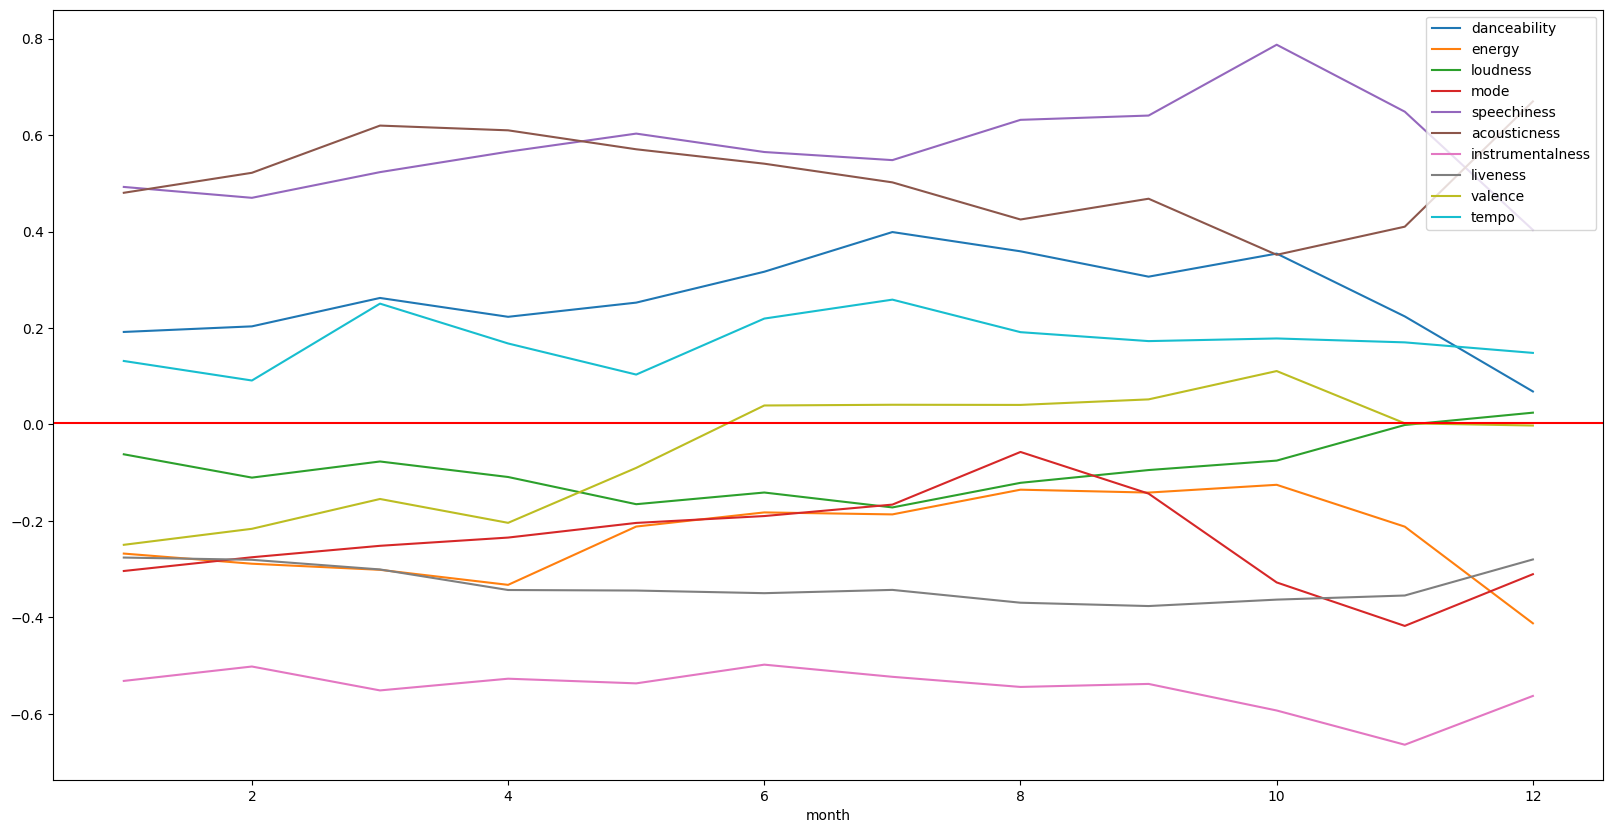

In [34]:
showFeaturesMeanInYear(2019, features)

In [52]:
def showFeatureMeanByMonths(year, feature):
    # show feature mean by month in a year
    # show feature mean by month of all years
    # 2 plots in one plot
    data_year = data[data['year'] == year]
    data_year = data_year[['month', feature]]
    data_year = data_year.groupby('month').mean()

    data_all = data[['month', feature]]
    data_all = data_all.groupby('month').mean()
    
    plt.figure(figsize=(20, 10))
    plt.plot(data_year.index, data_year[feature], label=f'{year}')
    plt.plot(data_all.index, data_all[feature], label='all years')
    plt.xlabel('month')
    plt.ylabel(feature)
    plt.title(f'{feature} mean by month')
    plt.legend()
    plt.show()
    


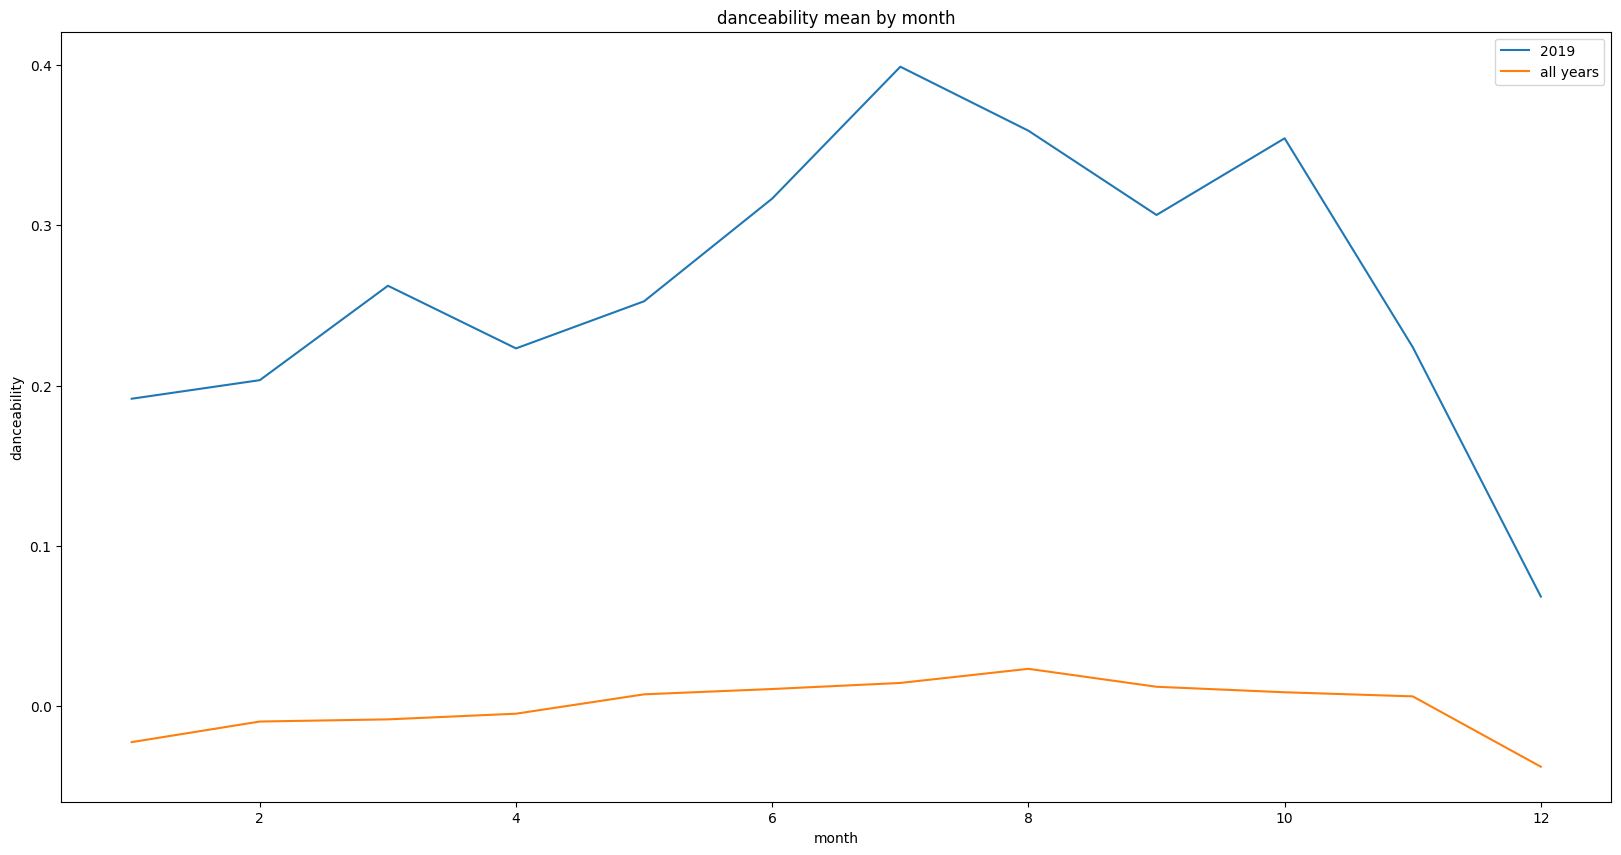

In [53]:
showFeatureMeanByMonths(2019, 'danceability')

In [42]:
# show feature mean of a month through years

def showFeatureMeanByYears(month, feature):
    # show feature mean of a month through years
    data_month = data[data['month'] == month]
    data_month = data_month[['year', feature]]
    data_month = data_month.groupby('year').mean()

    data_month.plot()
    plt.show()

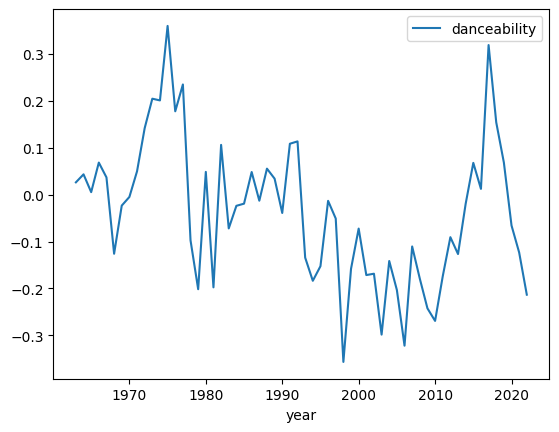

In [43]:
showFeatureMeanByYears(12, 'danceability')

In [75]:
# draw 12 month's plot together in subplots

def showFeatureMeanByMonthsTogether(feature):
    # draw 12 month's plot together in subplots
    fig, axs = plt.subplots(3, 4, figsize=(20, 20))
    fig.suptitle(f'{feature} mean by month', fontsize=40)
    # fix y-axis range
    for i in range(1, 13):
        data_month = data[data['month'] == i]
        data_month = data_month[['year', feature]]
        data_month = data_month.groupby('year').mean()
        month_list = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
        data_month.plot(ax=axs[(i-1)//4][(i-1)%4], title=month_list[i-1])
        axs[(i-1)//4][(i-1)%4].set_ylim([-1, 1])
    plt.show()
    
    

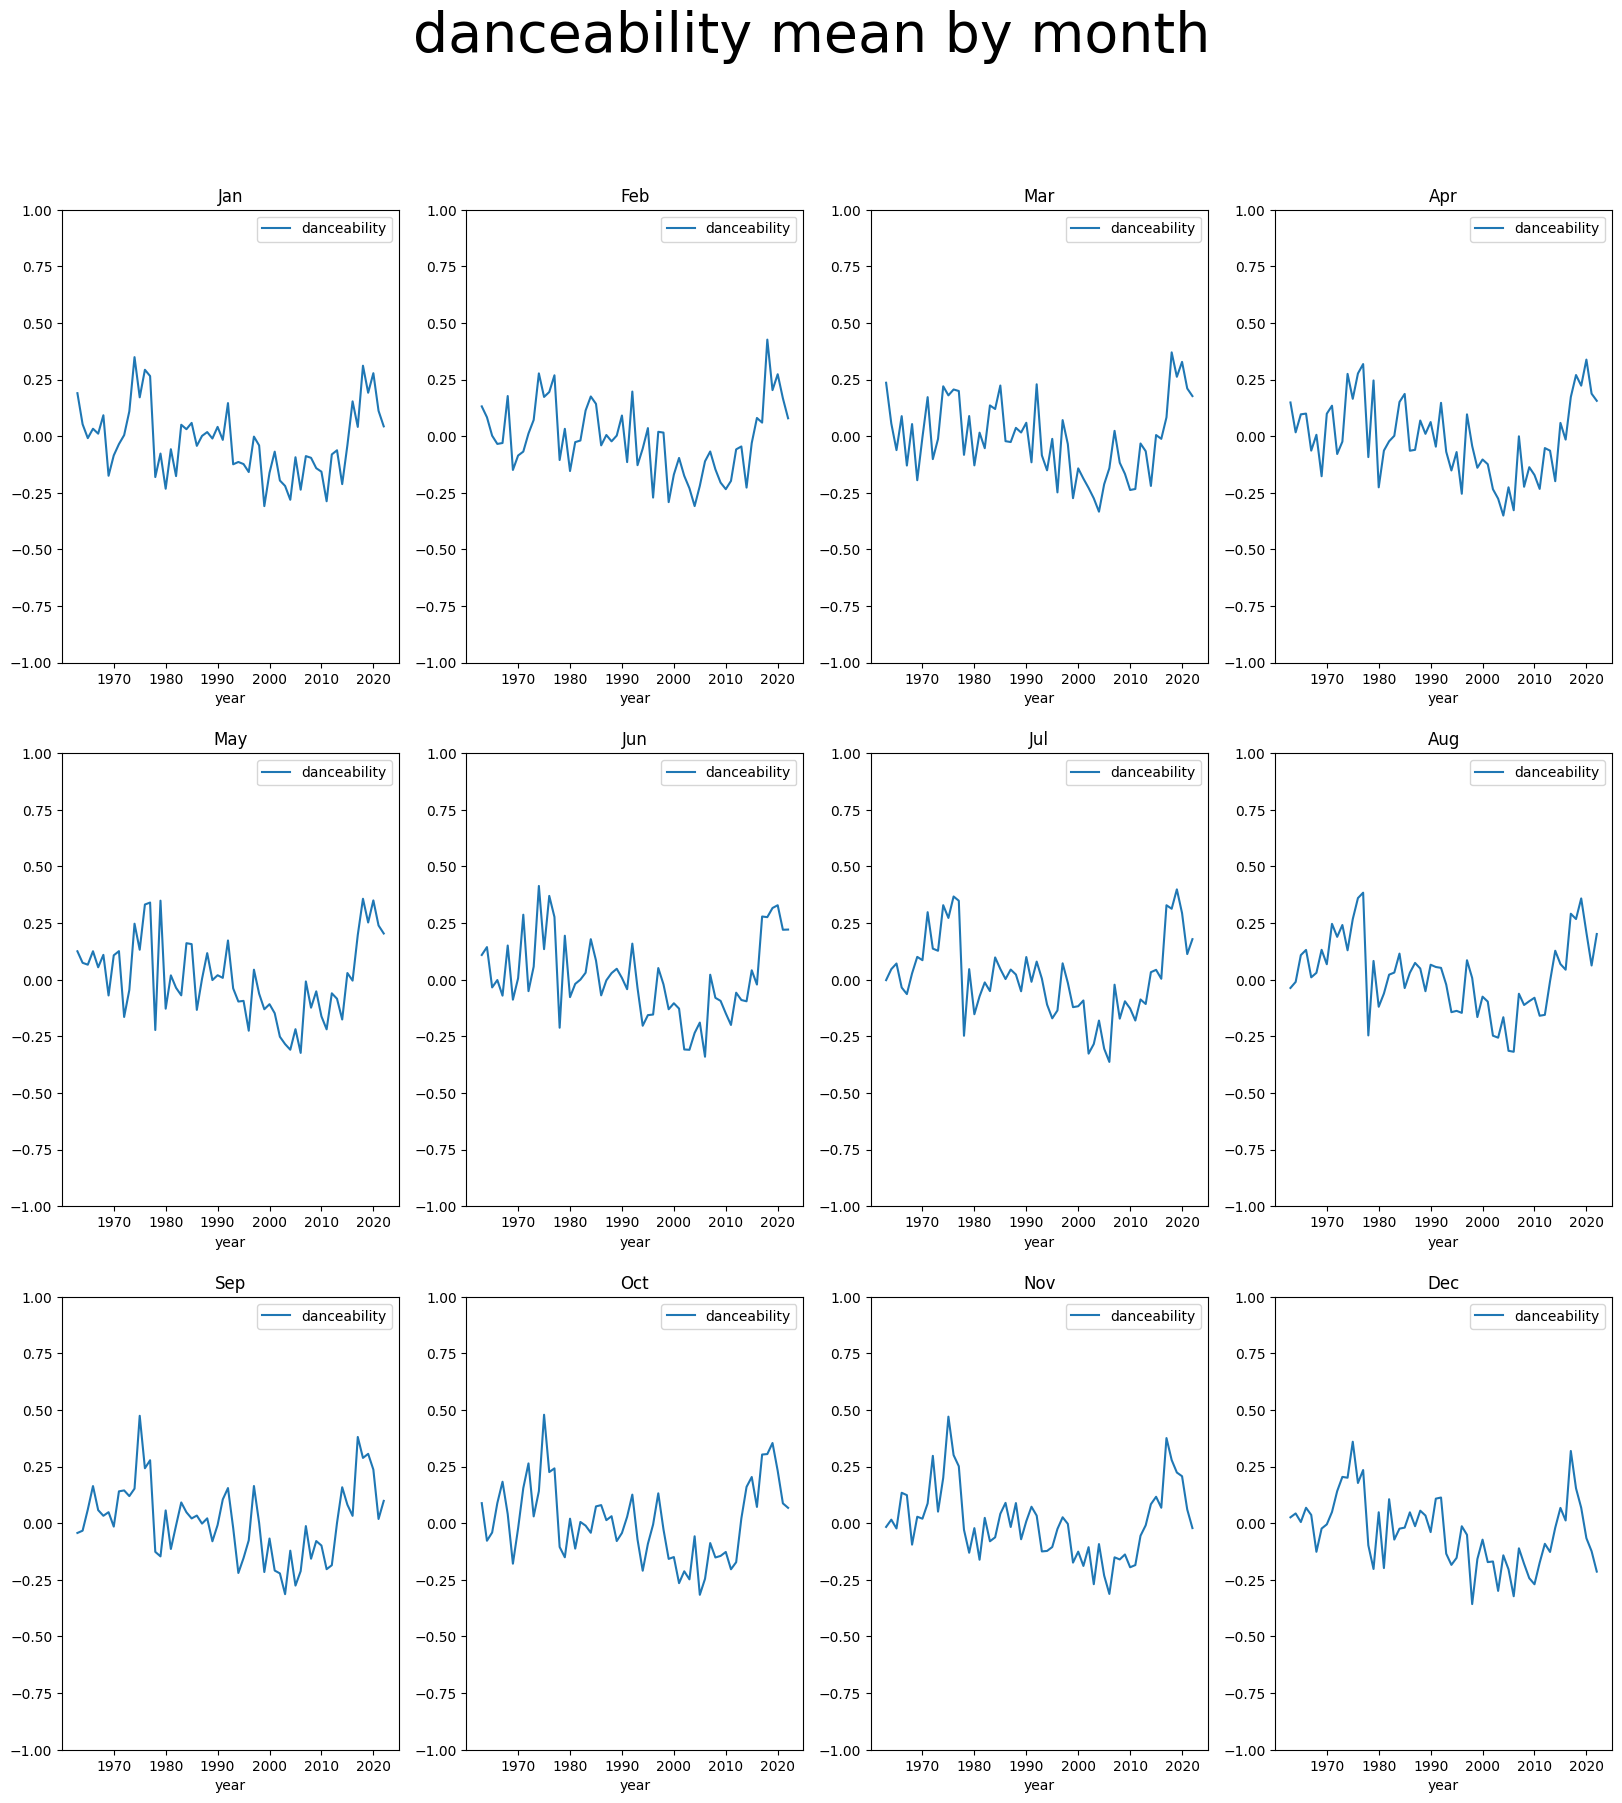

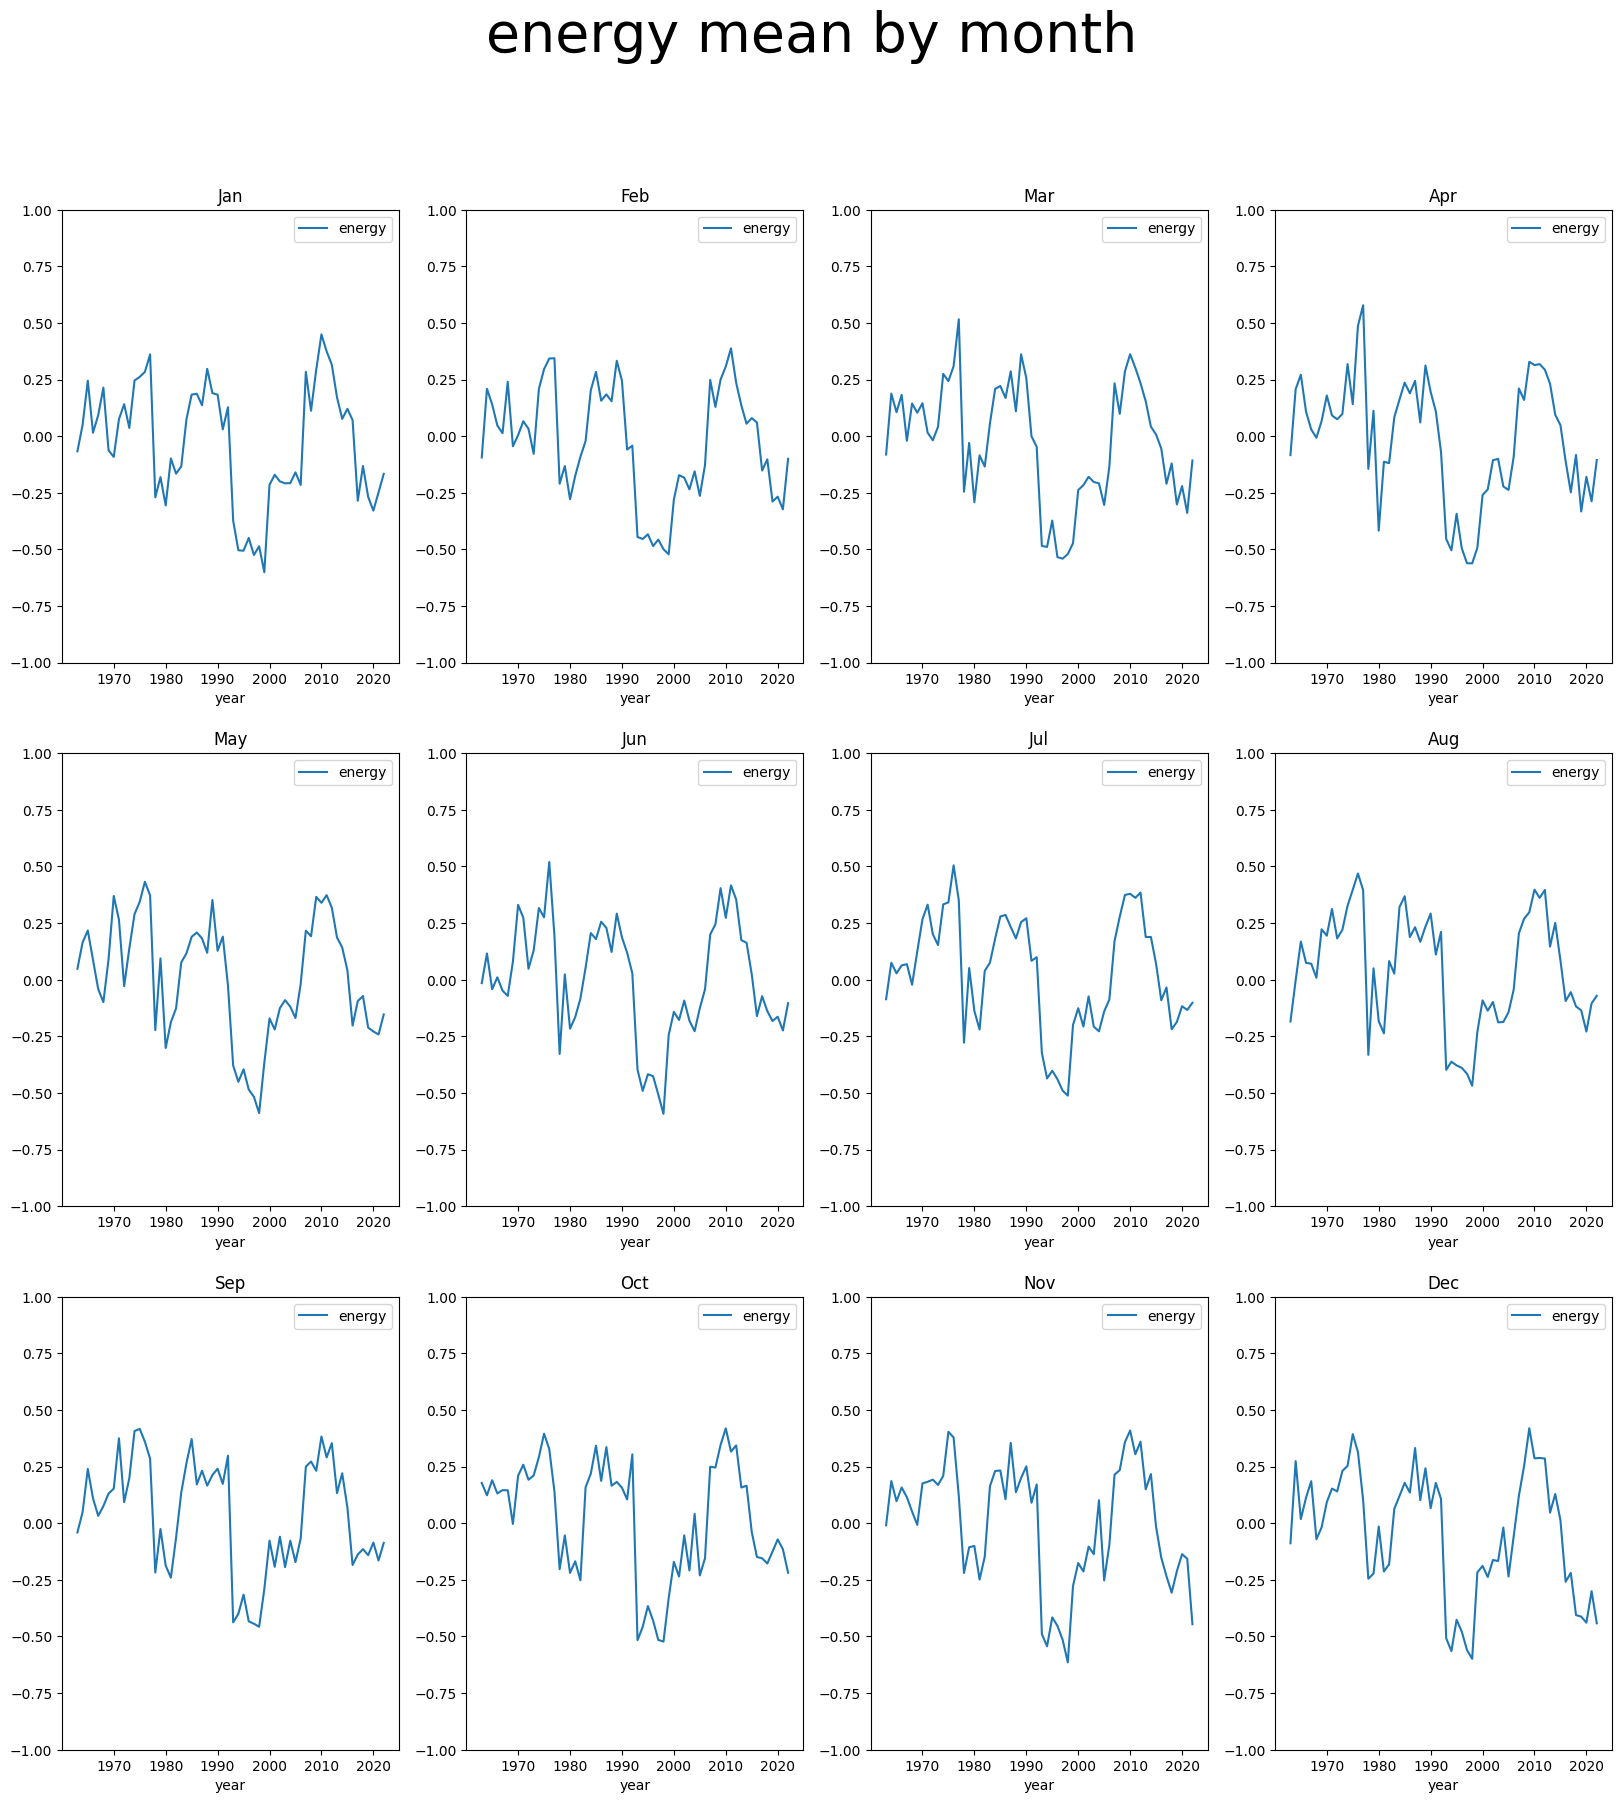

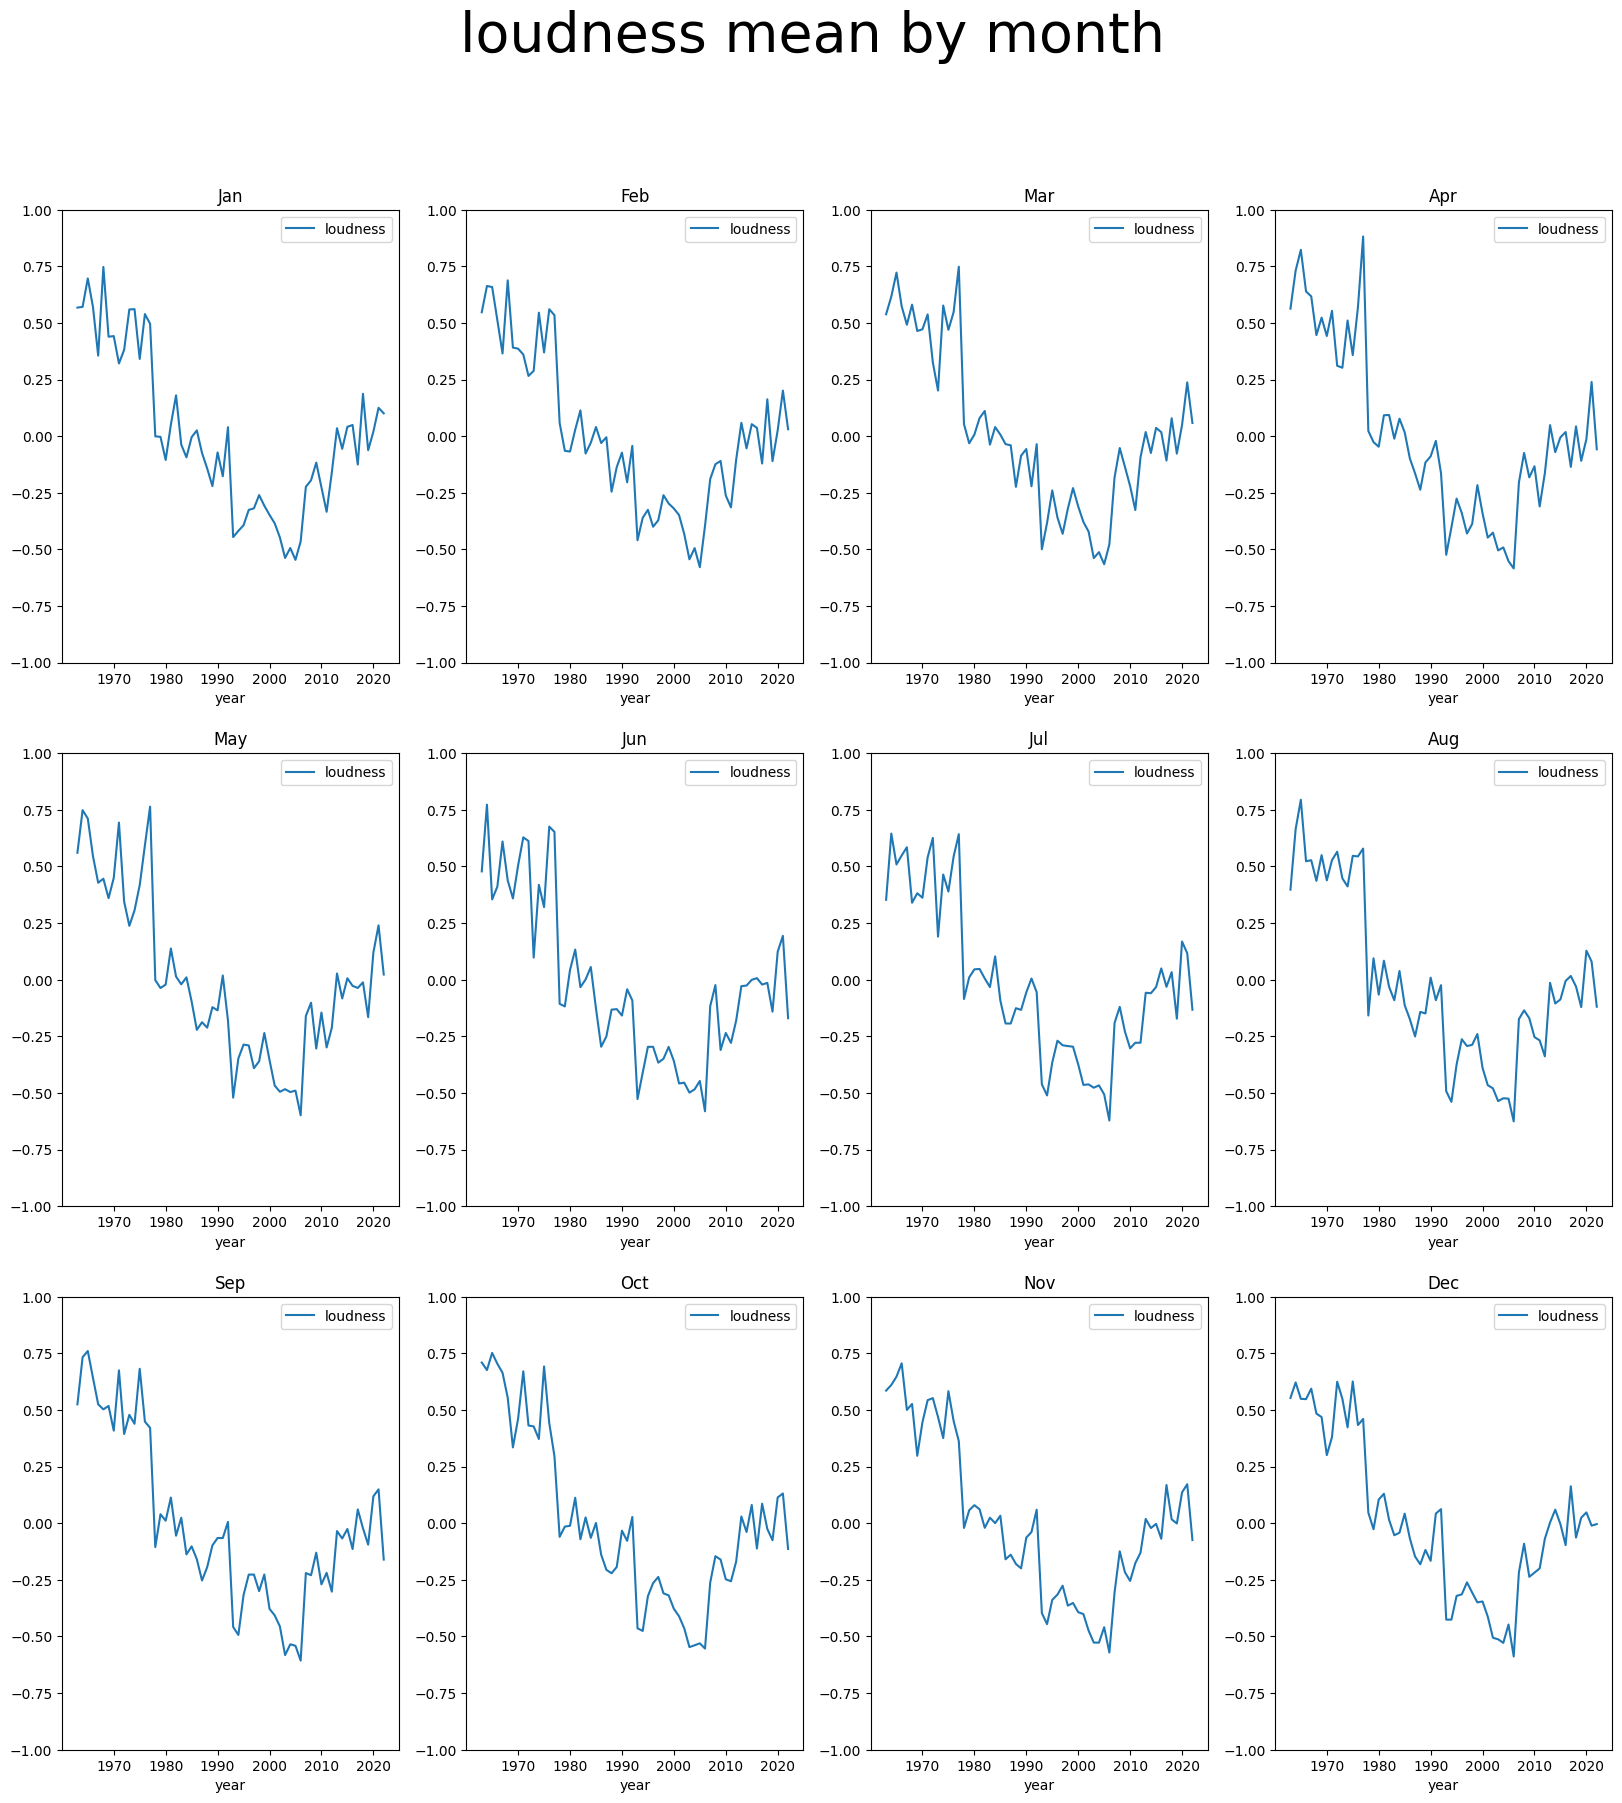

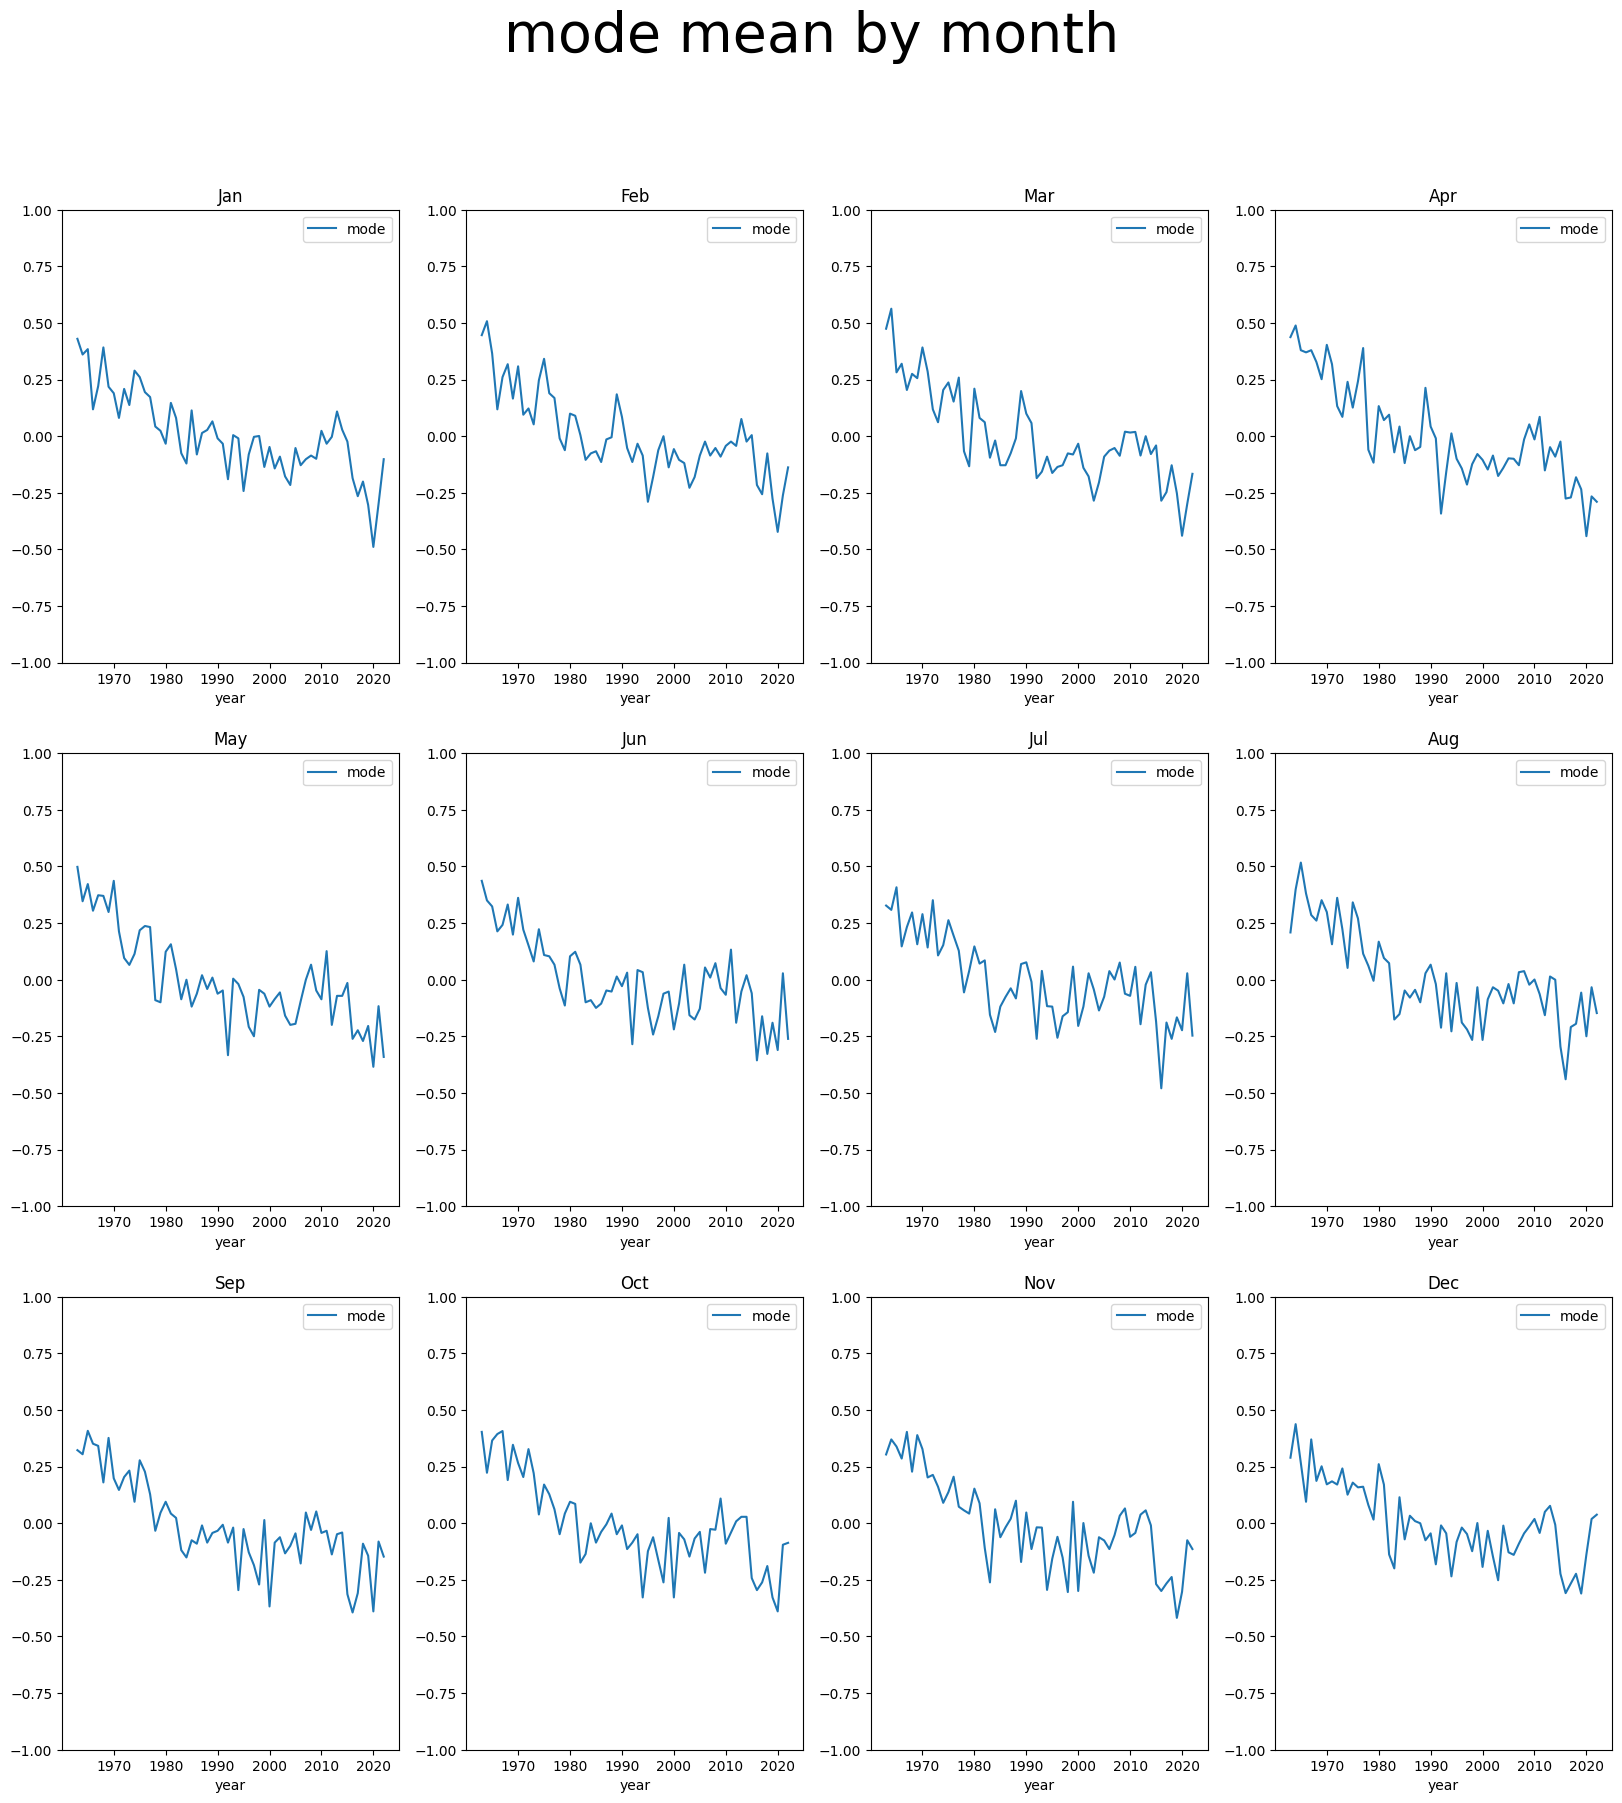

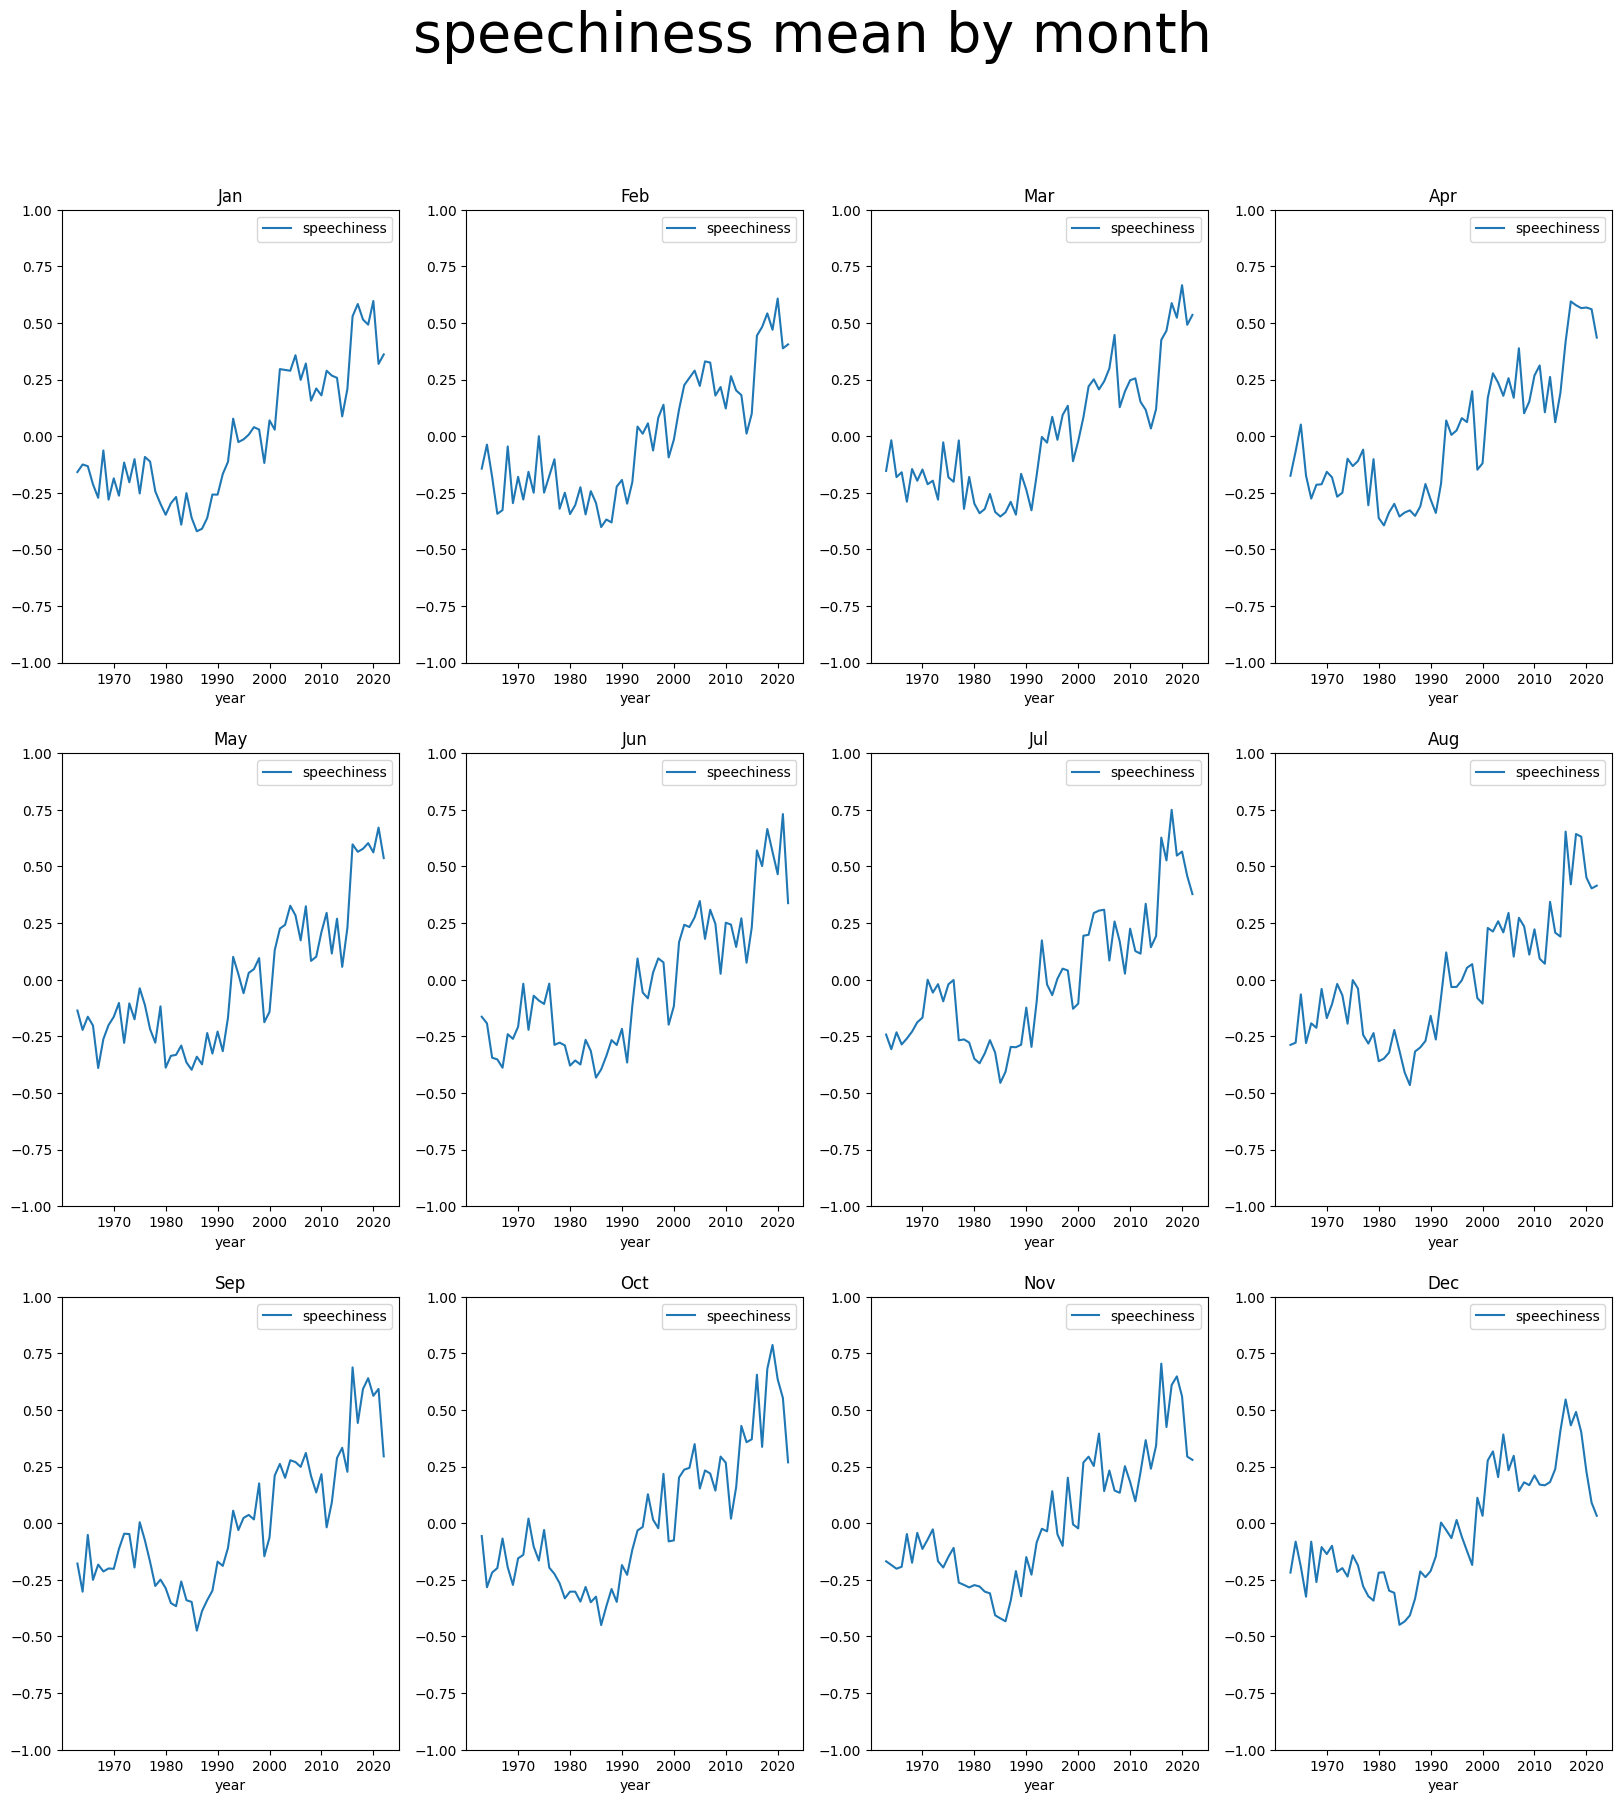

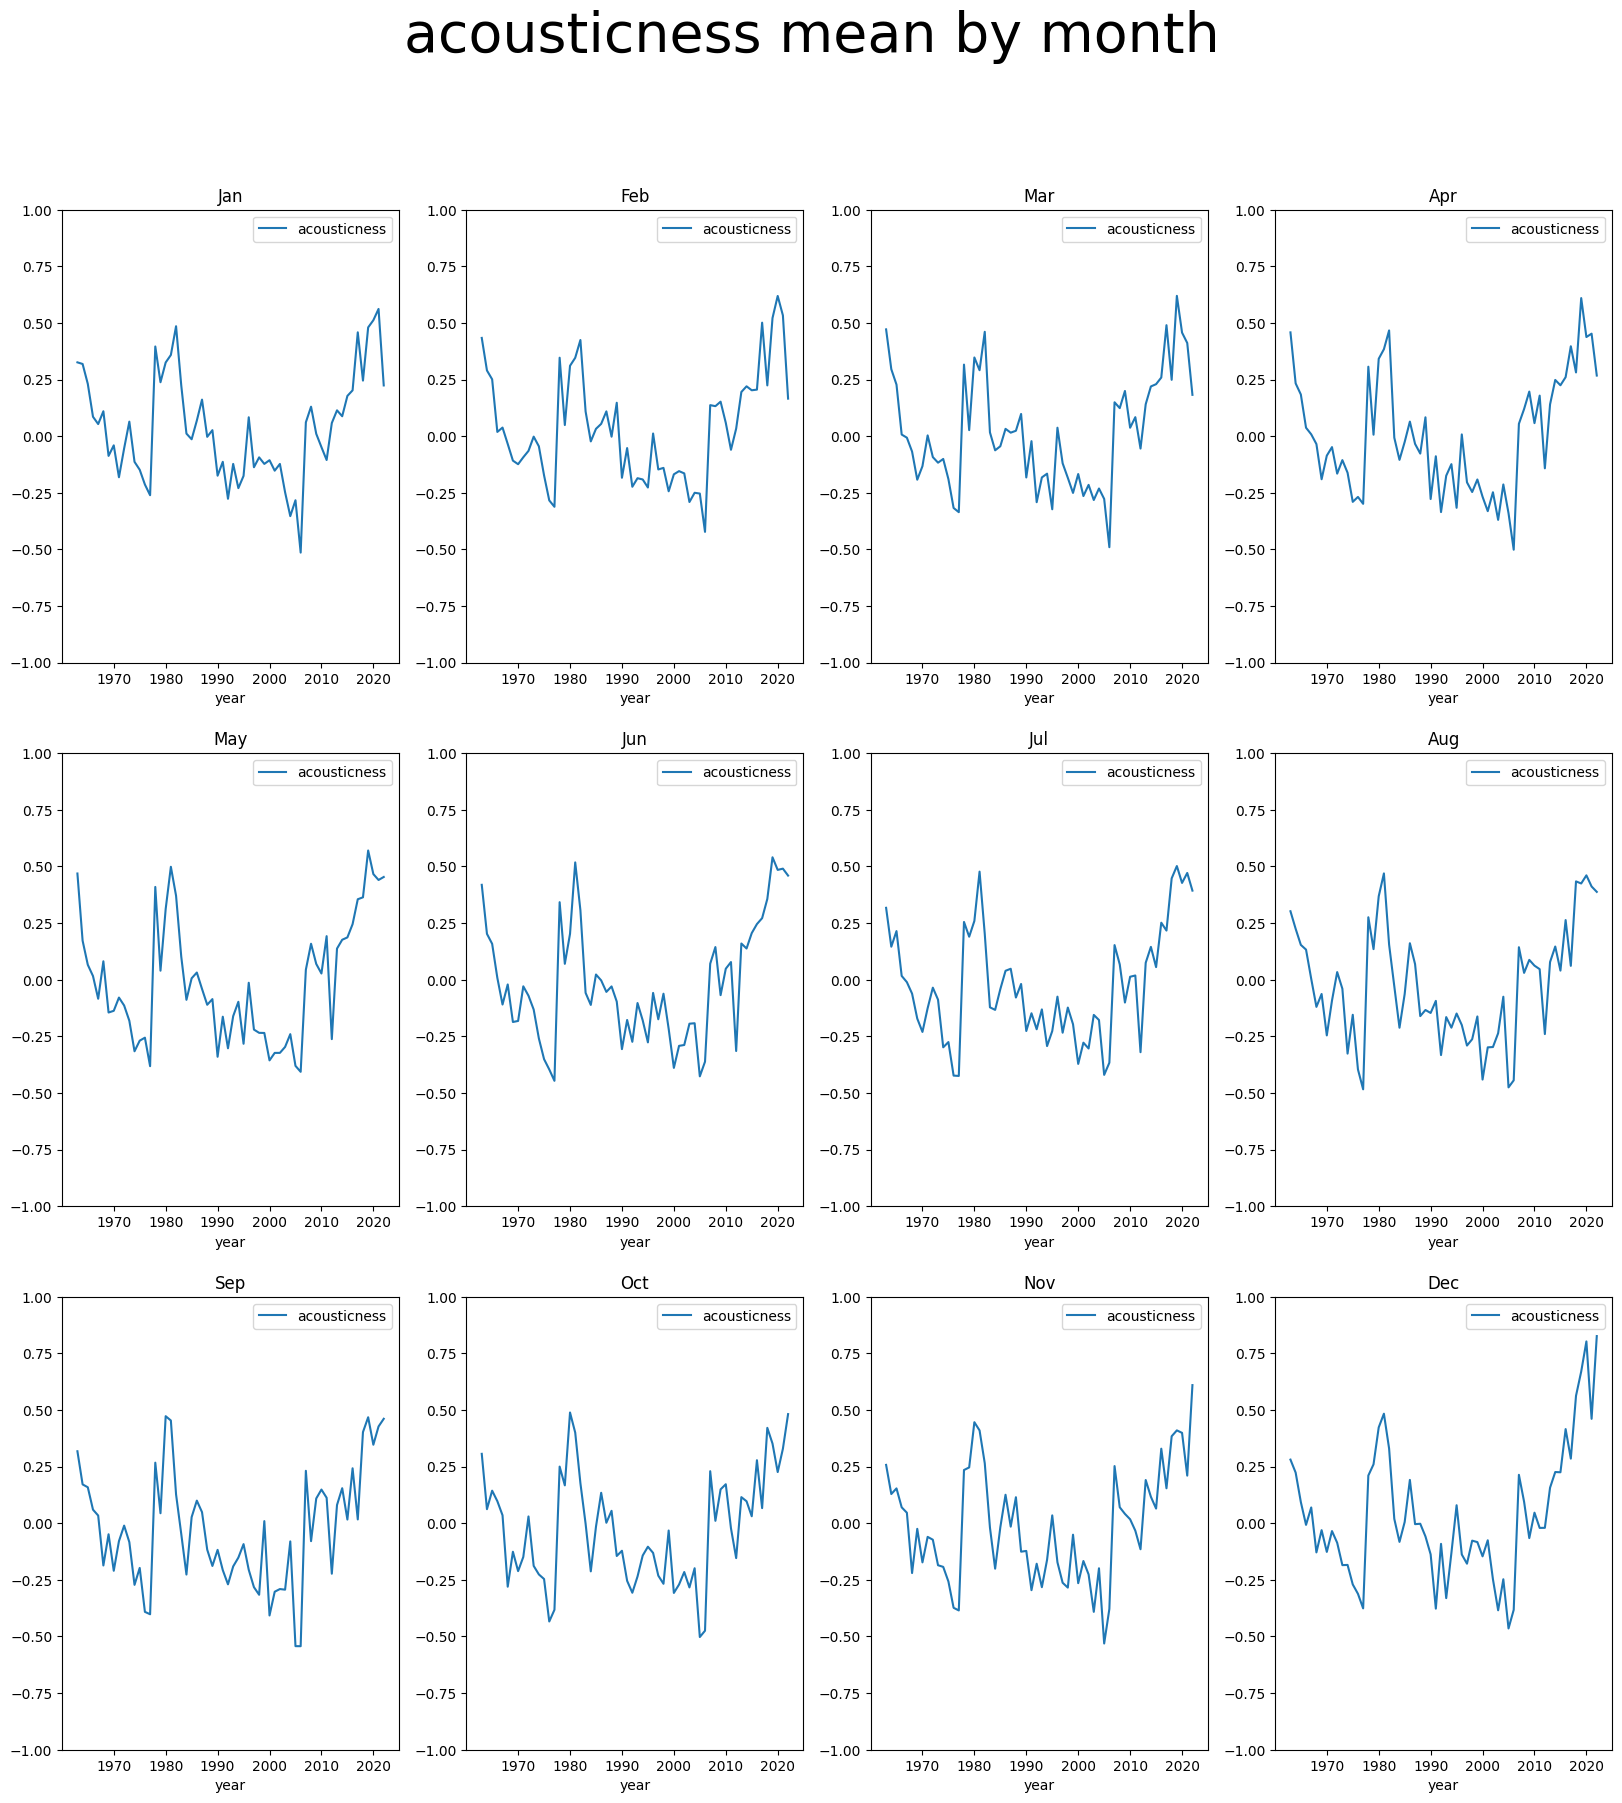

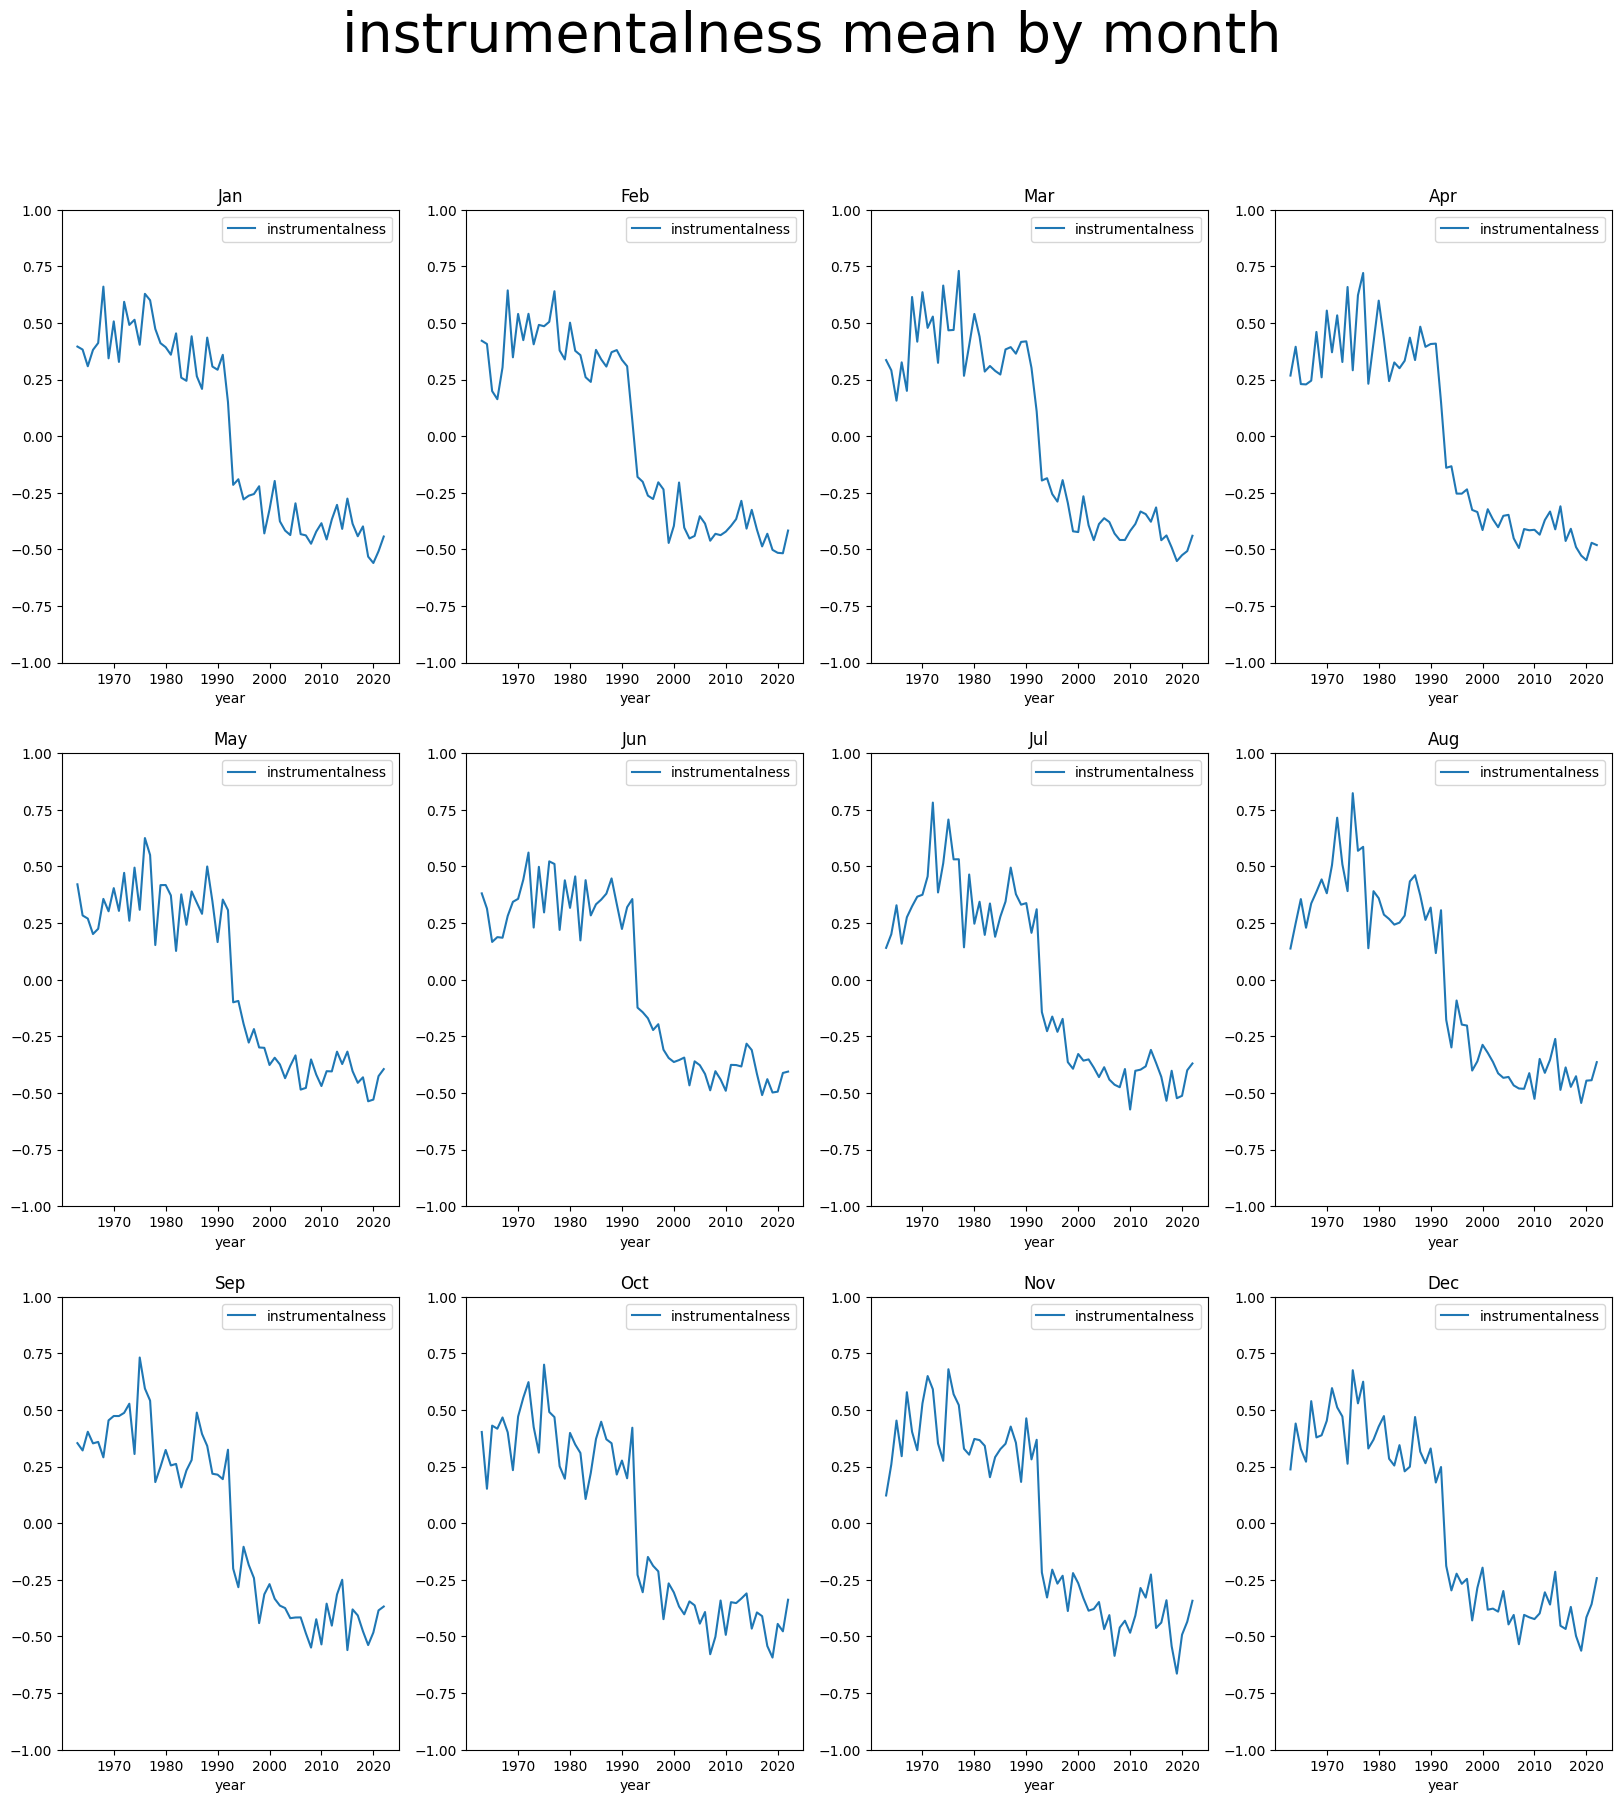

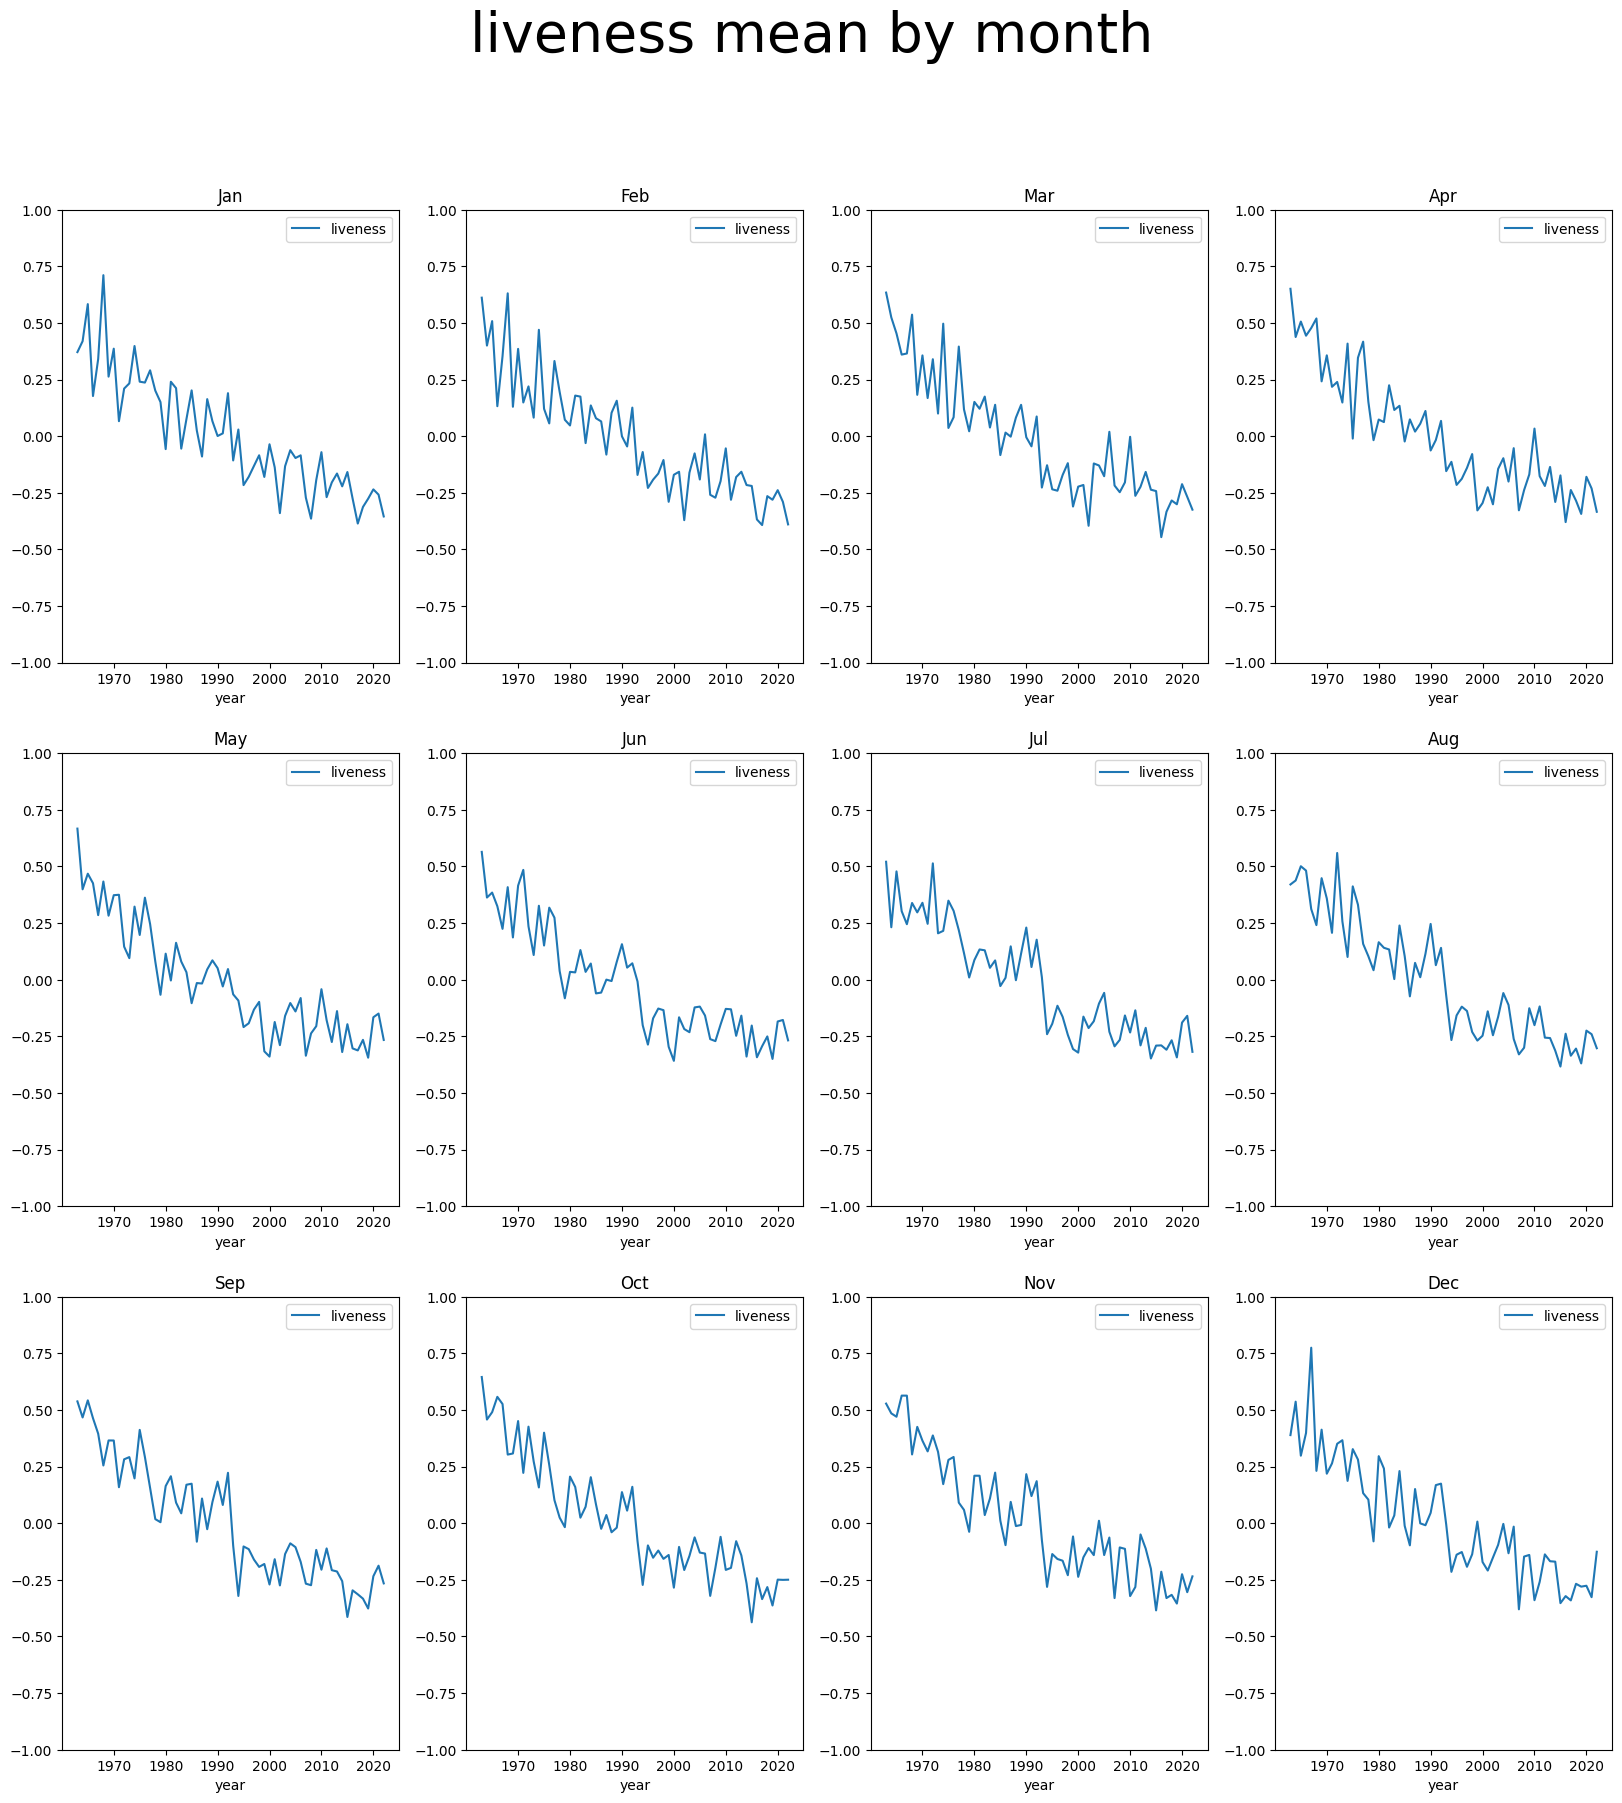

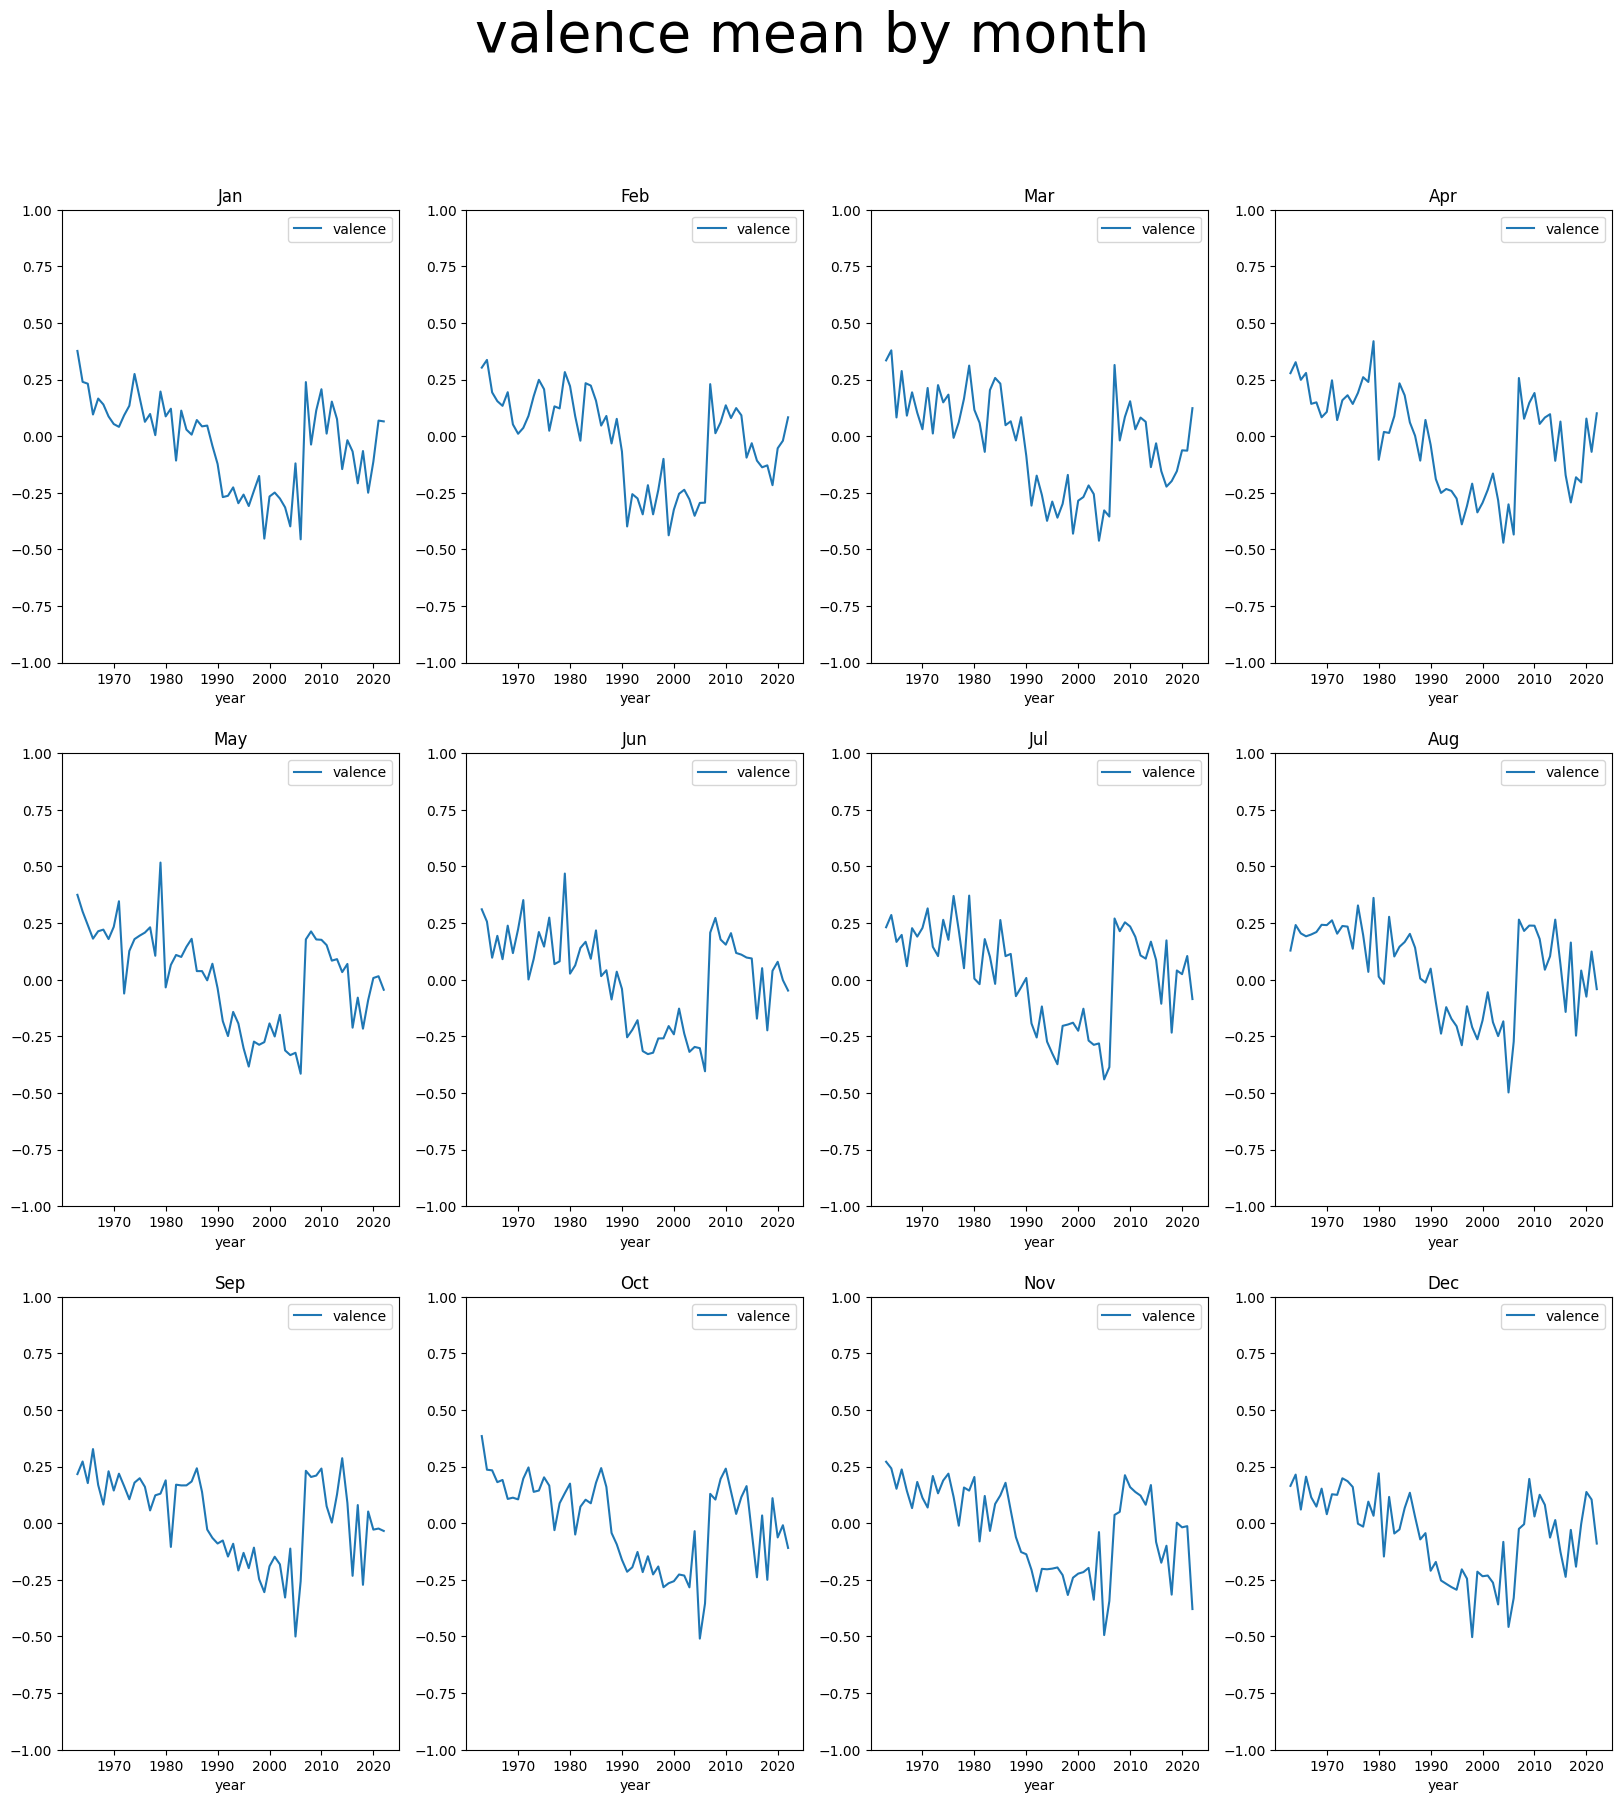

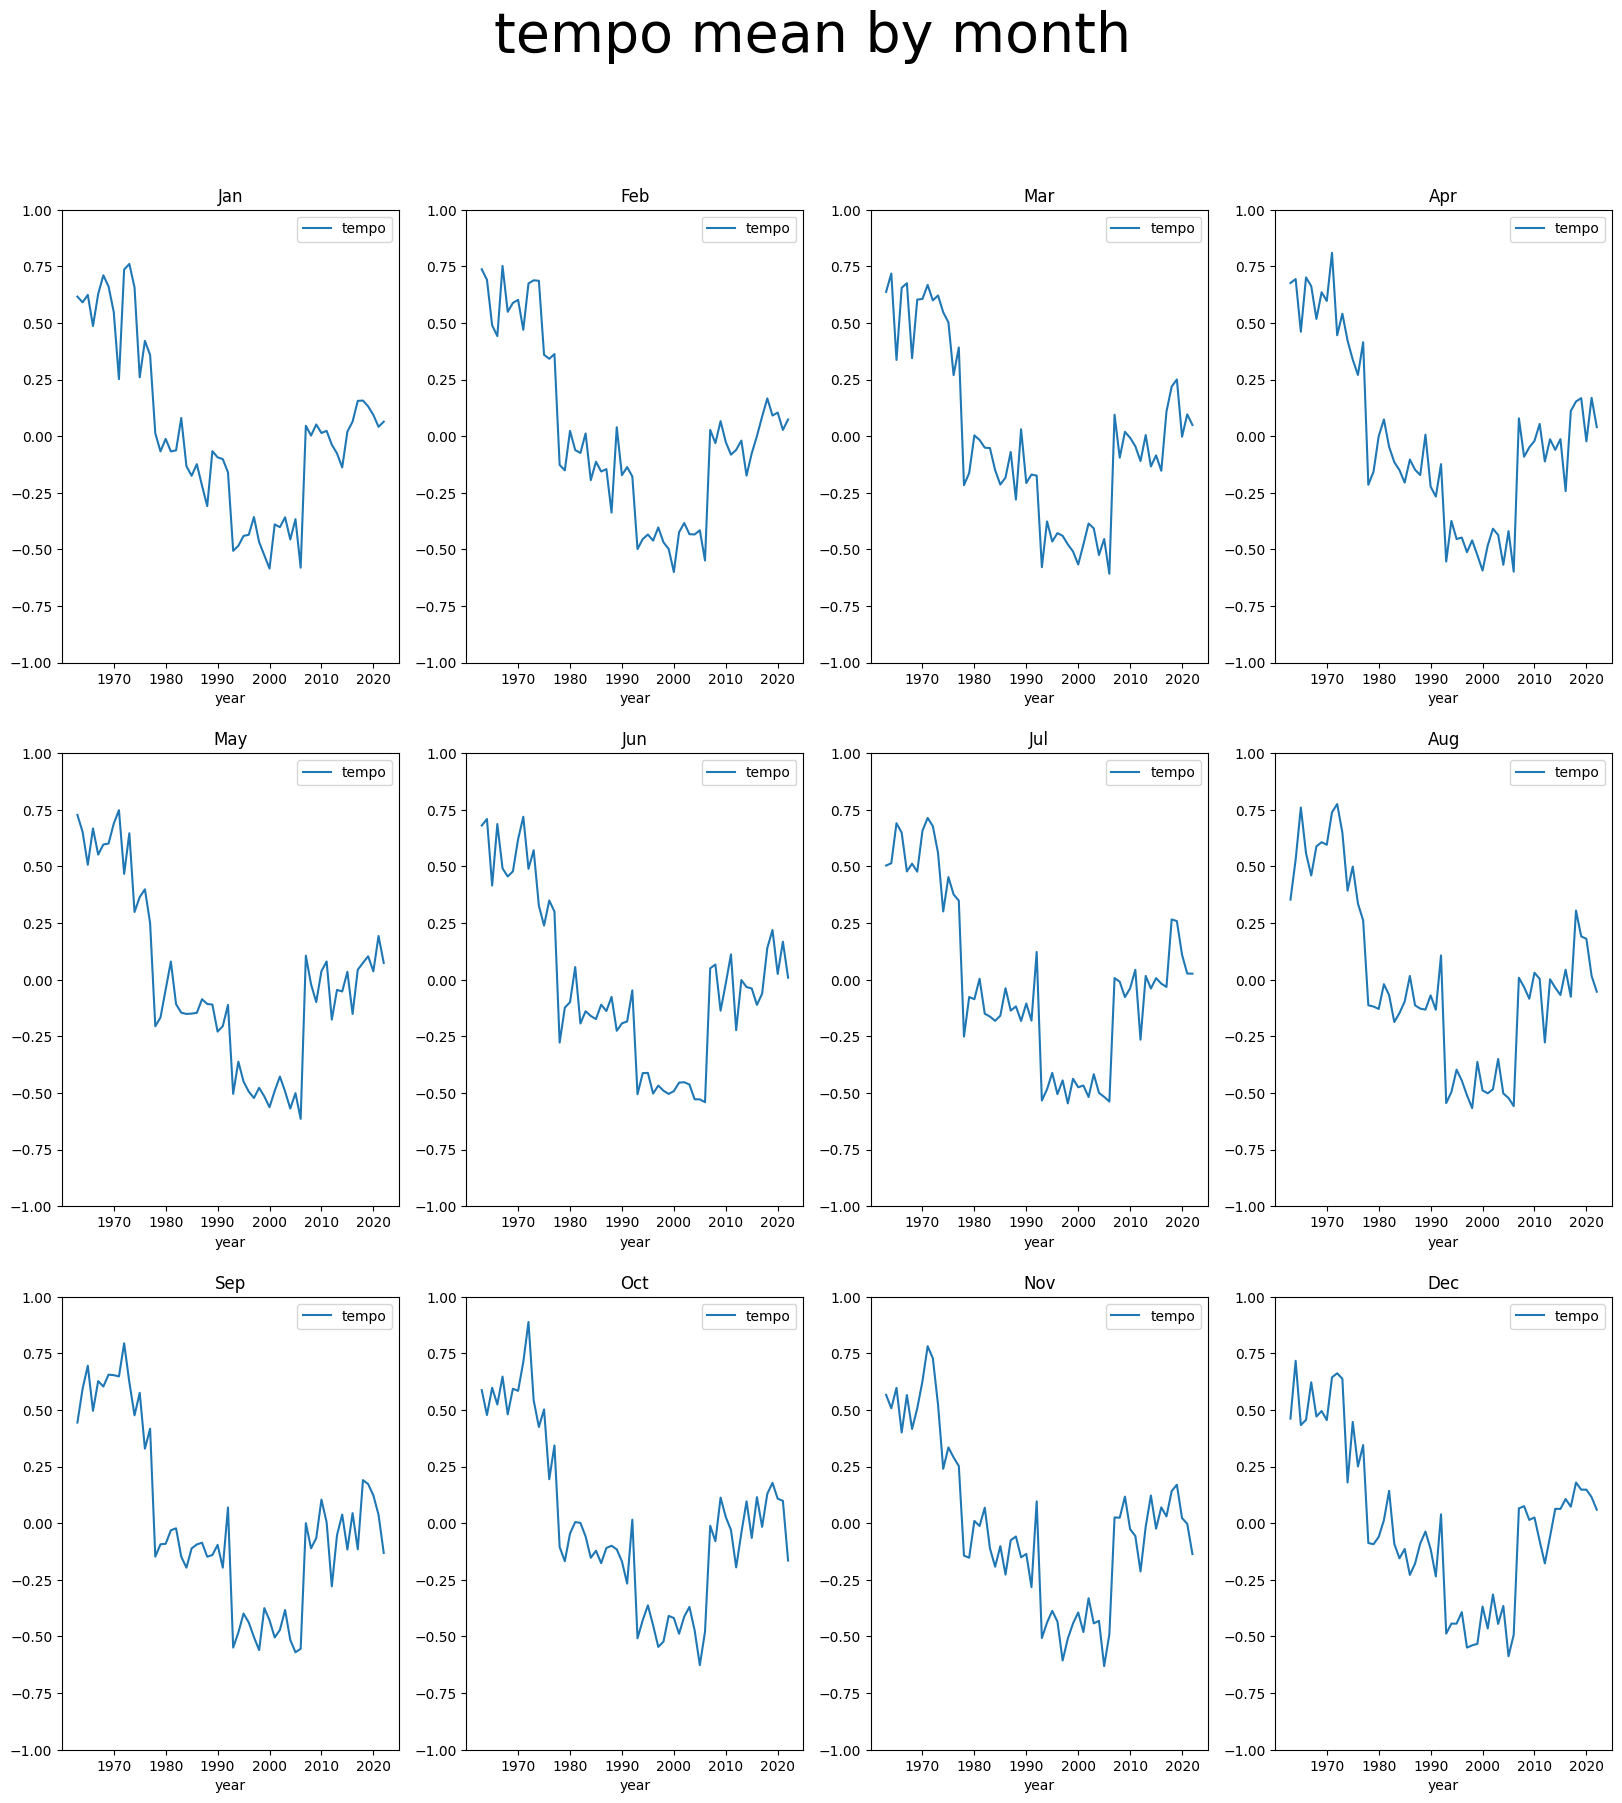

In [79]:
for feature in features:
    showFeatureMeanByMonthsTogether(feature)

In [145]:
    # draw 12 month's plot together in subplots
    def showFeatureMeanByYearsTogether():
        fig, axs = plt.subplots(2, 5, figsize=(30, 14))
        month_list = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
        # fix y-axis range
        for j, feature in enumerate(features):
            for i in range(1, 13):
                data_month = data[data['month'] == i]
                data_month = data_month[['year', feature]]
                data_month = data_month.groupby('year').mean()
                data_month.plot(ax=axs[j//5][j%5], title=feature)
            axs[j//5][j%5].set_ylim([-1, 1]) 
            axs[j//5][j%5].set_title(feature)
        # show month in legend using month_list
        # show one legend for all subplot
        # no need to show 12 legends
        # no legend for other subplots
        for i in range(0, 10):
            axs[i//5][i%5].get_legend().remove()
        axs[1][4].legend(month_list, ncol=2, loc='upper right')
        plt.show()


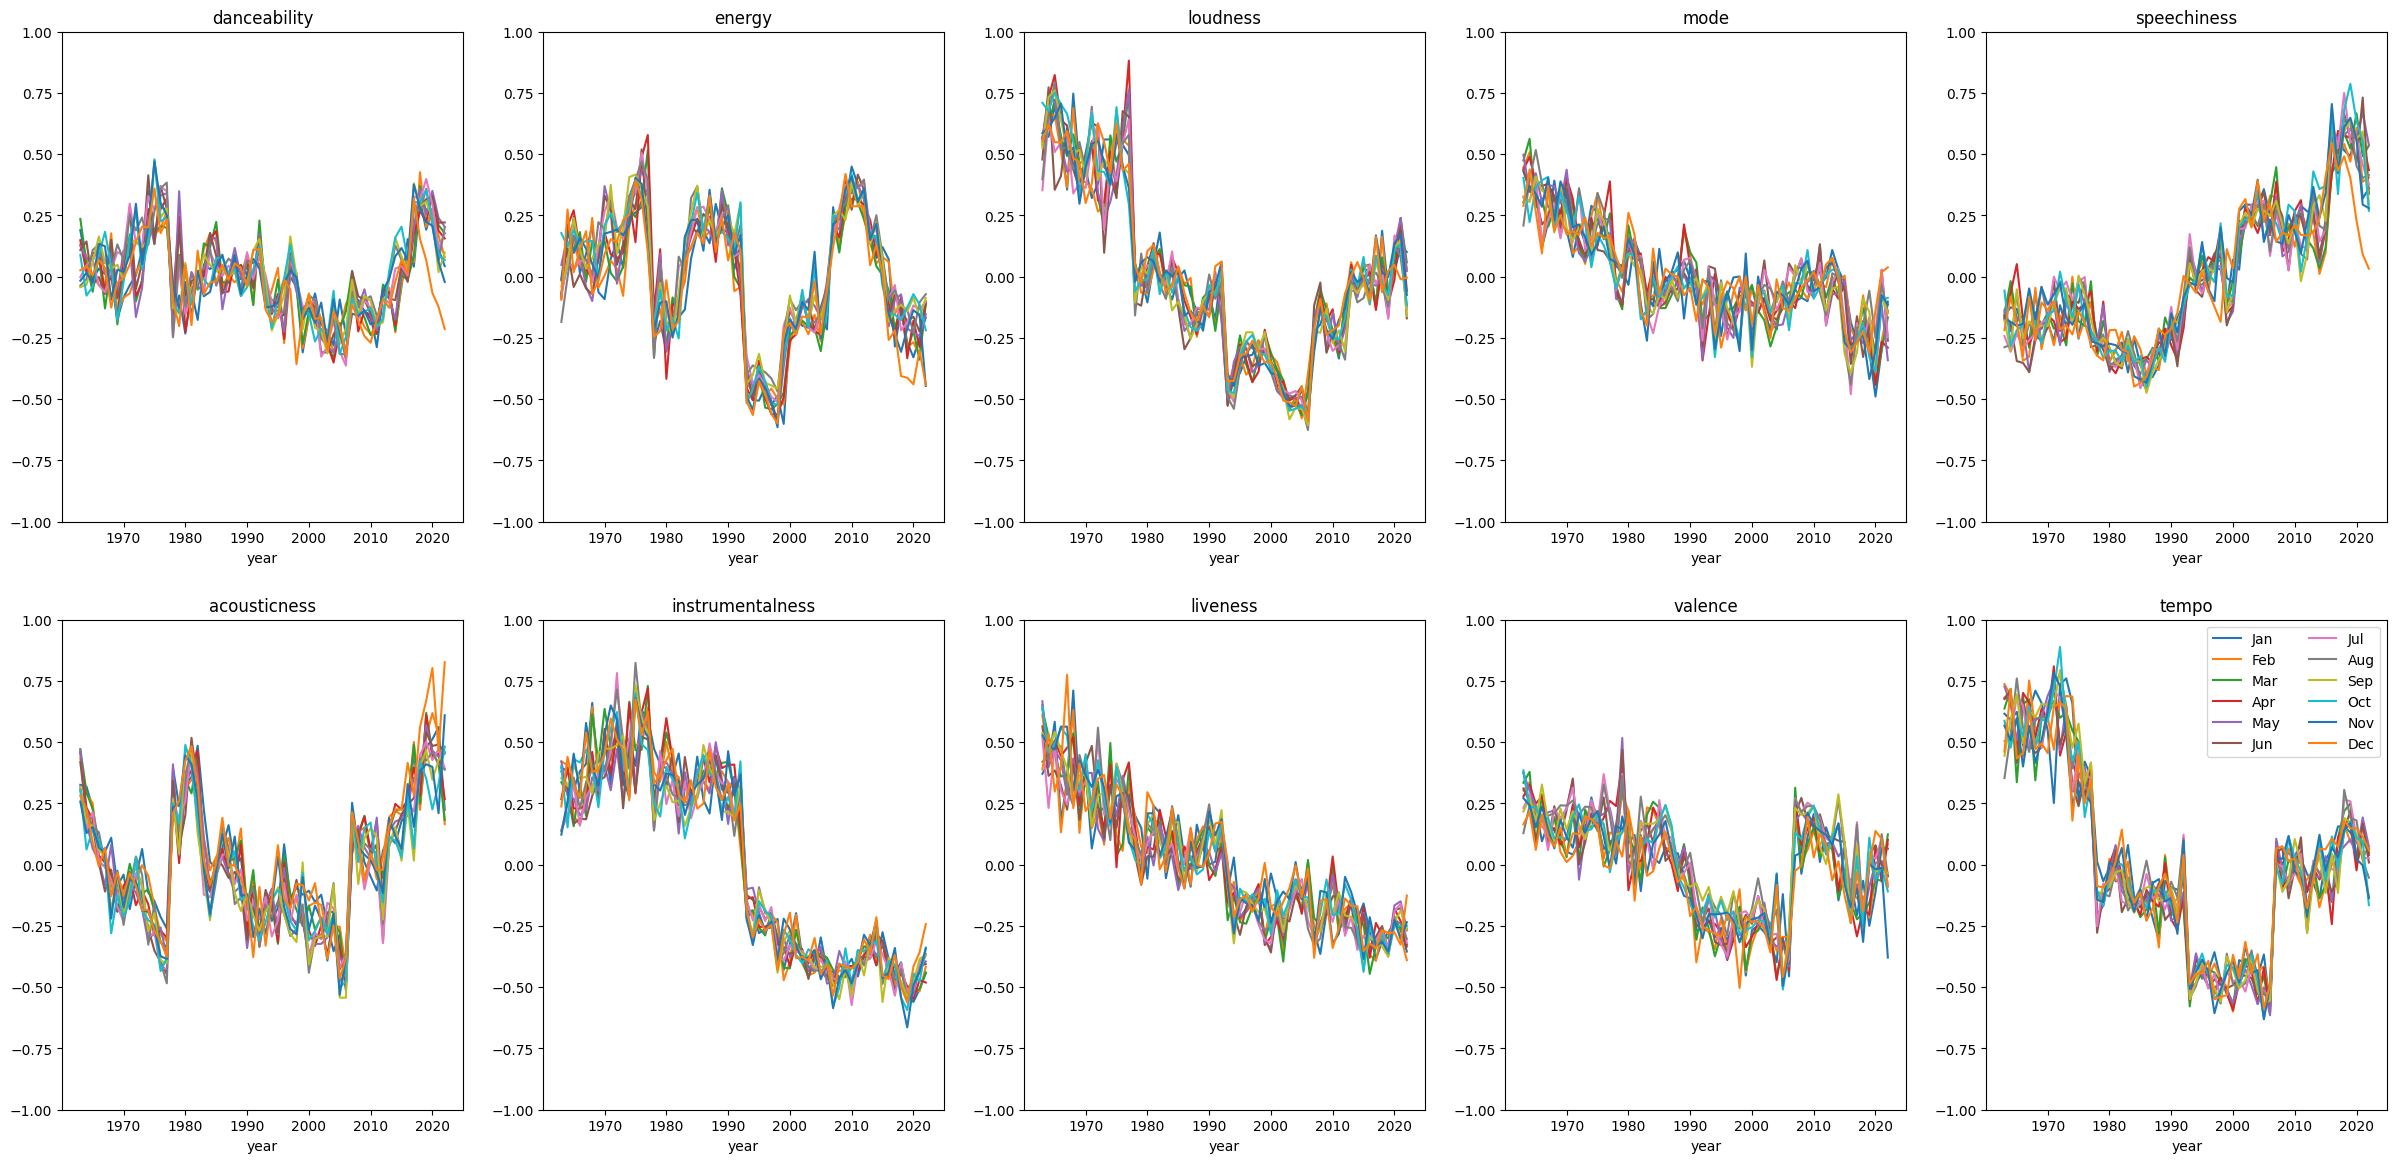

In [146]:
showFeatureMeanByYearsTogether()